#Loading the data after vectorizing it with the TCT





In [3]:
import pandas as pd




fake_df = pd.read_table(r'Datasets\Celebrity Dataset\Data Transformed\fake.tsv', delimiter = '\t')
true_df = pd.read_table(r'Datasets\Celebrity Dataset\Data Transformed\true.tsv', delimiter = '\t')




In [4]:
print("FAKE \n ", fake_df.describe())
print("TRUE \n ", true_df.describe())


FAKE 
                id       DESPC       DESSC       DESWC       DESPL      DESPLd  \
count  240.00000  240.000000  240.000000  240.000000  240.000000  210.000000   
mean   120.50000    3.450000    5.450000  124.137500    3.012153    2.379021   
std     69.42622    1.404416    2.018119   37.044837    1.368605    1.421870   
min      1.00000    1.000000    2.000000   60.000000    1.000000    0.000000   
25%     60.75000    3.000000    4.000000   97.750000    2.000000    1.414214   
50%    120.50000    3.000000    5.000000  116.500000    2.500000    2.121320   
75%    180.25000    5.000000    7.000000  143.000000    3.500000    3.535534   
max    240.00000    7.000000   13.000000  263.000000   13.000000    7.778175   

           DESPLw       DESSL      DESSLd     DESWLsy  ...  \
count  240.000000  240.000000  240.000000  240.000000  ...   
mean    67.612153   23.981907    9.471967    1.470710  ...   
std     28.368480    5.907101    4.024708    0.120284  ...   
min     25.250000   11.

In [5]:
if "text_key" in fake_df.columns:
    fake_df= fake_df.drop(labels="text_key", axis = 1) # categorical value will trigger an error when normalizing so we take this column out
    
if "text_key" in true_df.columns:   
    true_df = true_df.drop(labels="text_key", axis = 1)
    
# if "id" in fake_df.columns: 
#     fake_df= fake_df.drop(labels="id", axis = 1) 

# if "id" in true_df.columns: 
#     true_df = true_df.drop(labels="id", axis = 1)

In [6]:
print(fake_df.columns)
print(true_df.columns)

Index(['id', 'DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL',
       'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd', 'LDTTRc',
       'LDTTRa', 'LDMTLD', 'LDHDD', 'SYNLE', 'SYNNP', 'SYNMEDpos', 'SYNMEDwrd',
       'SYNMEDlem', 'SYNSTRUTa', 'SYNSTRUTt', 'RDFRE', 'READFKGL',
       'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
       'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'TOKEN_ATTRIBUTE_RATIO_URL',
       'TOKEN_ATTRIBUTE_RATIO_EMAIL', 'WORD_SET_INCIDENCE_WRDPRP1s',
       'WORD_SET_INCIDENCE_WRDPRP1p', 'WORD_SET_INCIDENCE_WRDPRP2',
       'WORD_SET_INCIDENCE_WRDPRP3s', 'WORD_SET_INCIDENCE_WRDPRP3p',
       'WORD_SET_INCIDENCE_CNCCaus', 'WORD_SET_INCIDENCE_CNCLogic',
       'WORD_SET_INCIDENCE_CNCTemp', 'WORD_SET_INCIDENCE_CNCAdd',
       'WORD_SET_INCIDENCE_CNCPos', 'WORD_SET_INCIDENCE_CNCNeg',
       'WORD_PROPERTY_WRDNOUN', 'WORD_PROPERTY_WRDVERB',
       'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDADV', 'WORD_PROPERTY_WRDFRQc',
       'WORD_PROPERTY_WR

In [7]:
#adding the polarity column
true_df["Polarity"] = "True"
fake_df["Polarity"] = "Fake"

dfs = [fake_df, true_df]
true_and_fake = pd.concat(dfs, axis = 0)

In [8]:
true_and_fake.shape

(480, 64)

In [9]:
#Normalizing the data for

df_scaled = true_and_fake
for column in true_and_fake.columns[:-1]:

  df_scaled[column]=(true_and_fake[column]-true_and_fake[column].min())/(true_and_fake[column].max()-true_and_fake[column].min())


In [10]:
#Number of features and text
df_scaled = df_scaled.drop(labels=["id"], axis=1)
print("Number of features:", df_scaled.drop(labels=["Polarity"], axis=1).shape[1])
print("Number of texts:", df_scaled.drop(labels=["Polarity"], axis=1).shape[0])

Number of features: 62
Number of texts: 480


In [11]:
df_scaled

DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw     DESSL  \
0    0.444444  0.000000  0.146154  0.027027  0.000000  0.151143  0.682139   
1    0.222222  0.176471  0.253846  0.148649  0.176471  0.201948  0.249849   
2    0.222222  0.235294  0.276923  0.189189  0.235294  0.220999  0.191726   
3    0.222222  0.176471  0.307692  0.148649  0.176471  0.240051  0.300706   
4    0.222222  0.294118  0.296154  0.229730  0.294118  0.220999  0.147614   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.222222  0.176471  0.296154  0.148649  0.176471  0.227350  0.289808   
236  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345  0.386983   
237  0.444444  0.000000  0.130769  0.000000  0.048029  0.075642  0.645812   
238  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426  0.153582   
239  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442  0.140868   

       DESSLd   DESWLsy  DESWLsyd  ...  WORD_PROPERTY_WRDHYPn  \
0    0.000000  1.000000  0.563762  ...               0.404405   
1    0.248429  0.109532  0.116088  ...               0.420646   
2    0.215594  0.199330  0.134906  ...               0.561619   
3    0.189370  0.191279  0.119235  ...               0.558820   
4    0.110956  0.139367  0.084885  ...               0.666625   
..        ...       ...       ...  ...                    ...   
235  0.164698  0.264674  0.203276  ...               0.506349   
236  0.384460  0.050249  0.047174  ...               0.455246   
237  0.000000  0.370429  0.251662  ...               0.592211   
238  0.189306  0.225581  0.206593  ...               0.492107   
239  0.240751  0.445890  0.305984  ...               0.633193   

     WORD_PROPERTY_WRDHYPv  WORD_PROPERTY_WRDHYPnv  WORD_PROPERTY_AOA  \
0                 0.233333                0.363359           0.536598   
1                 0.278947                0.072002           0.057090   
2                 0.150980                0.439013           0.197521   
3                 0.146154                0.479820           0.101196   
4                 0.313333                0.399818           0.219840   
..                     ...                     ...                ...   
235               0.452381                0.532710           0.293080   
236               0.119608                0.261489           0.097540   
237               0.322222                0.538168           0.352350   
238               0.056863                0.330483           0.095886   
239               0.255556                0.476738           0.629851   

     WORD_PROPERTY_AOA_MAX  WORD_PROPERTY_CONCRETENESS  \
0                 0.396186                    0.393986   
1                 0.309322                    0.612986   
2                 0.297608                    0.685996   
3                 0.147246                    0.814876   
4                 0.617585                    0.218604   
..                     ...                         ...   
235               0.306847                    0.621988   
236               0.323093                    0.499129   
237               0.606992                    0.835890   
238               0.423729                    0.532790   
239               0.447034                    0.534365   

     WORD_PROPERTY_PREVALENCE  WORD_PROPERTY_PREVALENCE_MIN  \
0                    0.674648                      0.674648   
1                    0.682585                      0.682585   
2                    0.654967                      0.654967   
3                    0.426085                      0.426085   
4                    0.515320                      0.515320   
..                        ...                           ...   
235                  0.530017                      0.530017   
236                  0.691053                      0.691053   
237                  0.640981                      0.640981   
238                  0.651265                      0.651265   
239                  0.574802      

In [12]:
df_scaled.to_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_normalized.csv")

# Comparing the value distribution for each feature according to the polarity of the text

Linguistic feature: DESPC


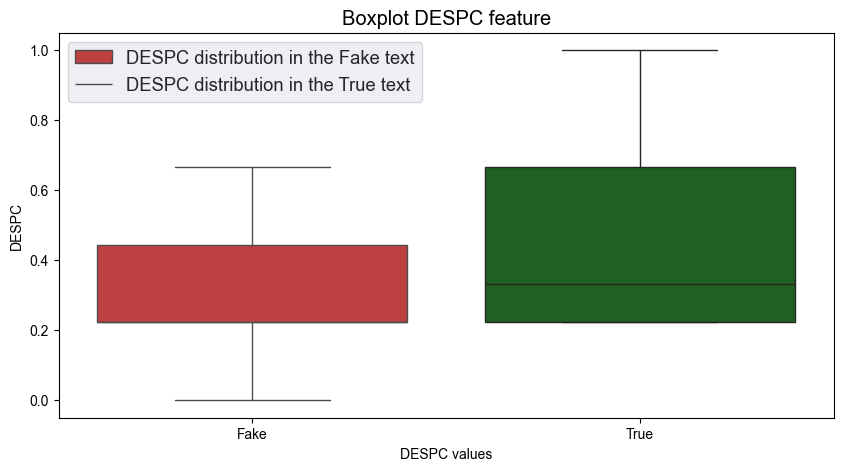

Linguistic feature: DESSC


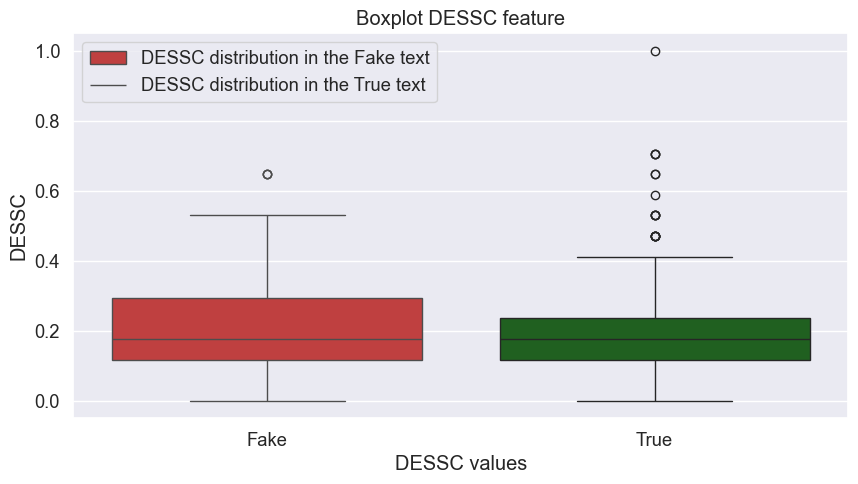

Linguistic feature: DESWC


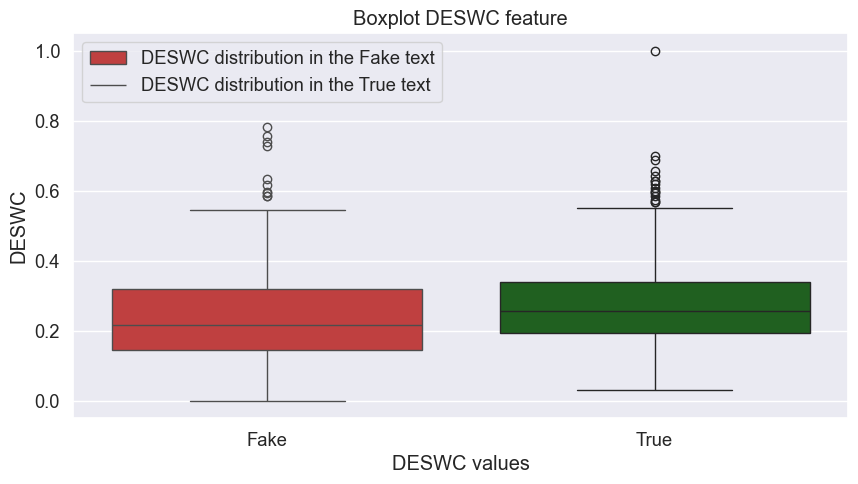

Linguistic feature: DESPL


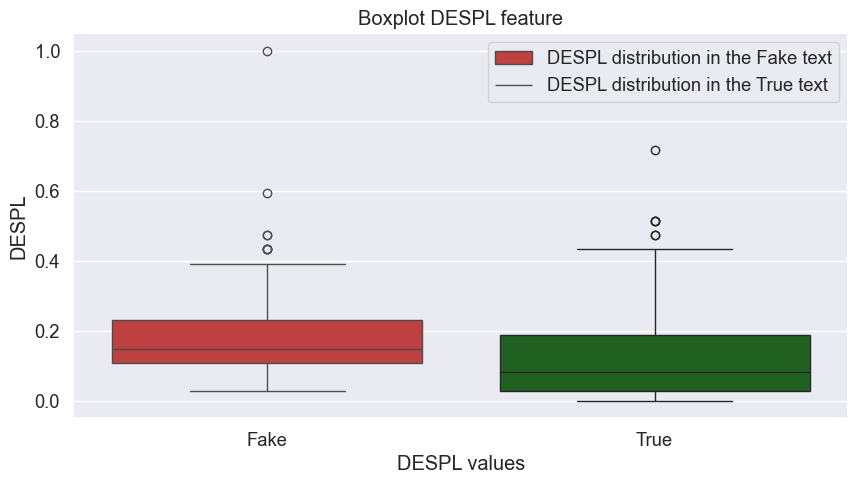

Linguistic feature: DESPLd


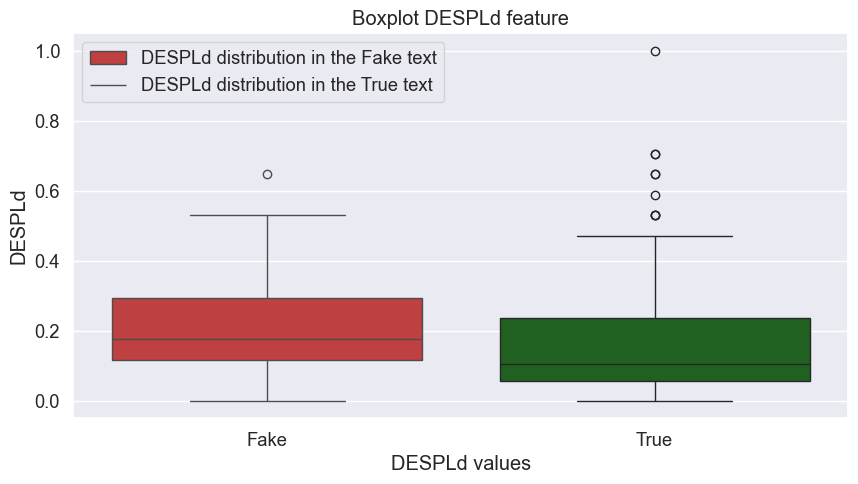

Linguistic feature: DESPLw


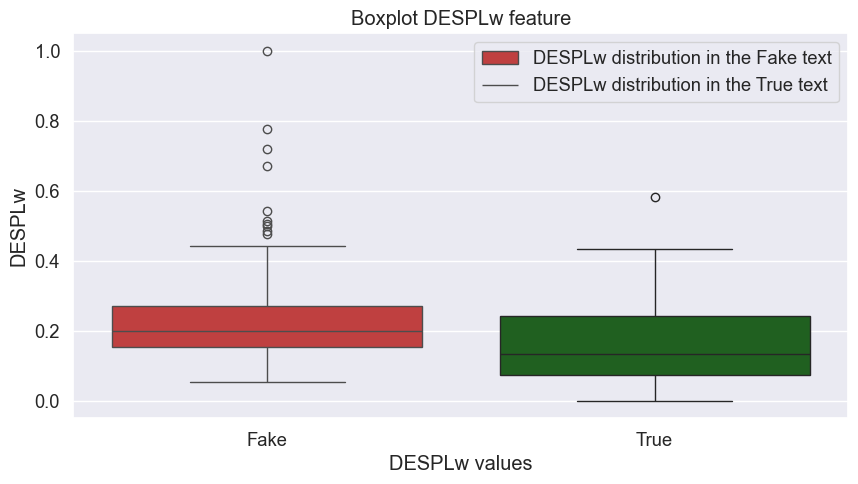

Linguistic feature: DESSL


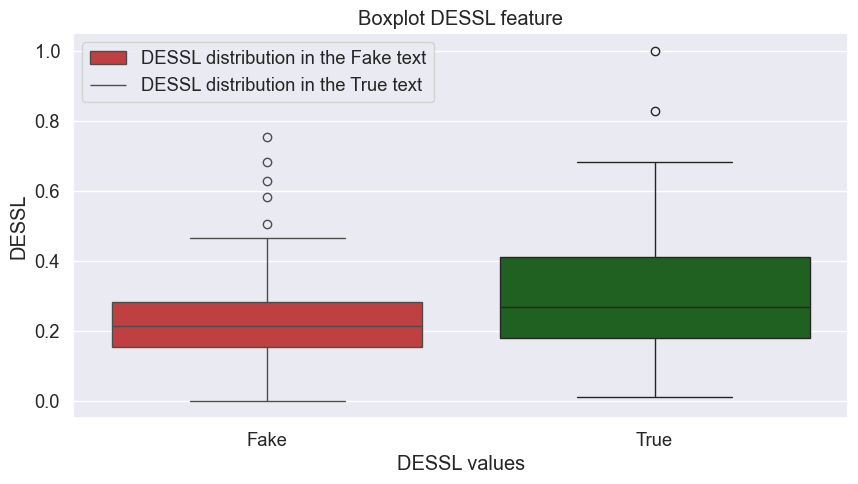

Linguistic feature: DESSLd


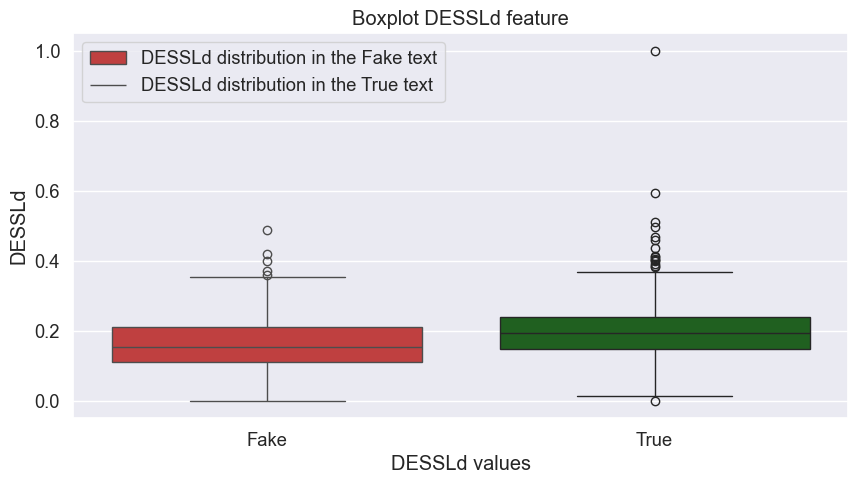

Linguistic feature: DESWLsy


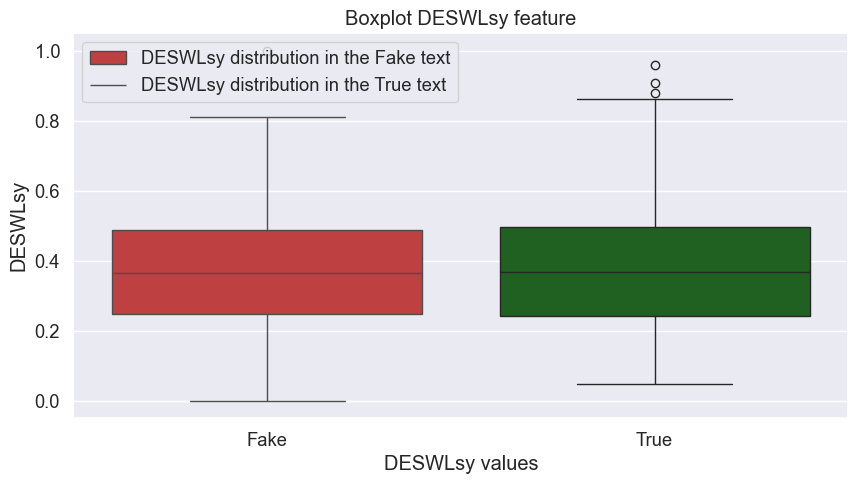

Linguistic feature: DESWLsyd


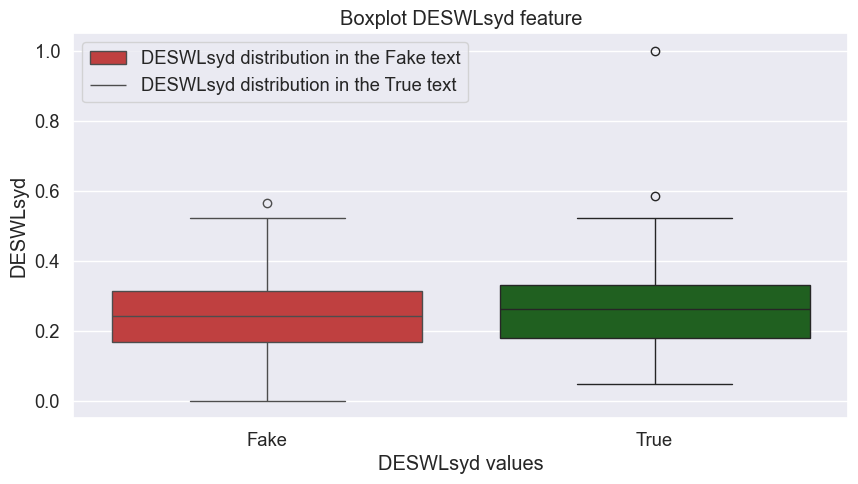

Linguistic feature: DESWLlt


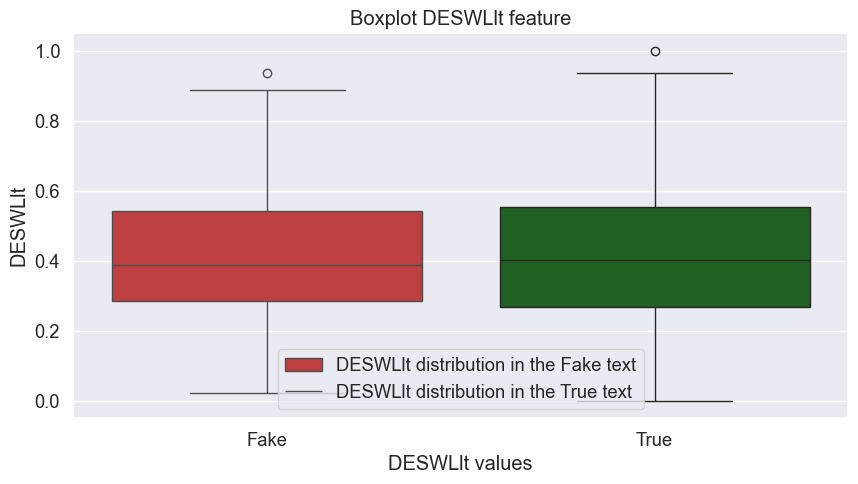

Linguistic feature: DESWLltd


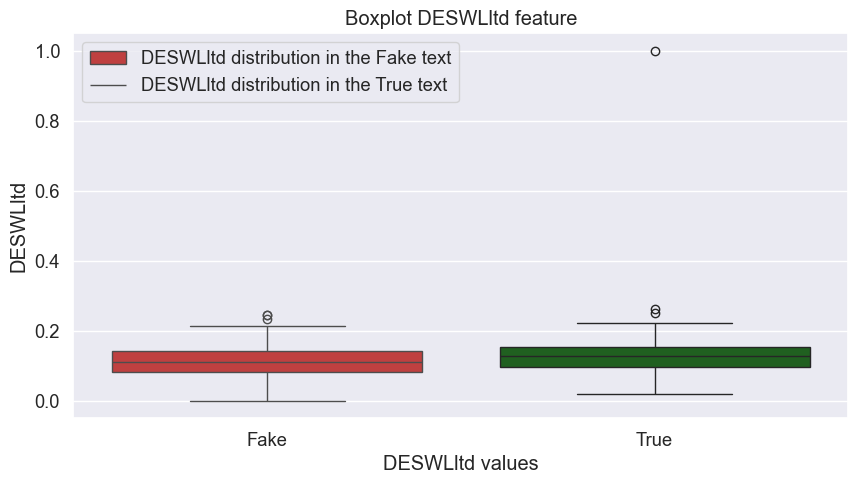

Linguistic feature: LDTTRc


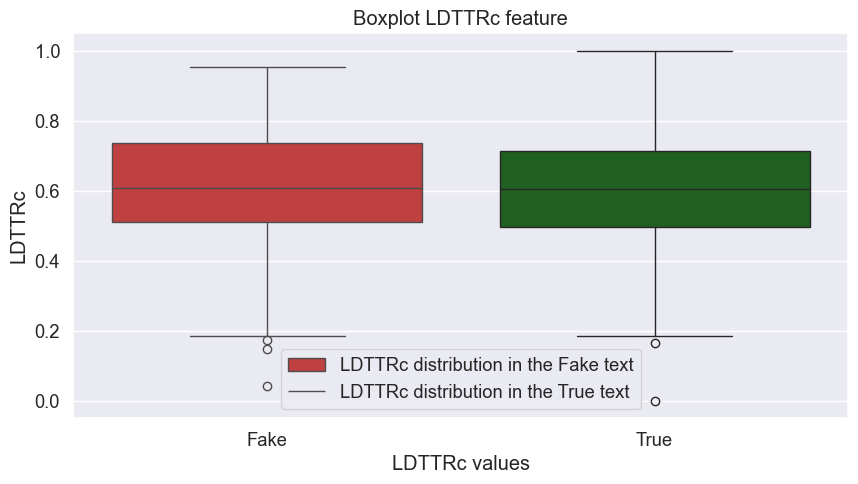

Linguistic feature: LDTTRa


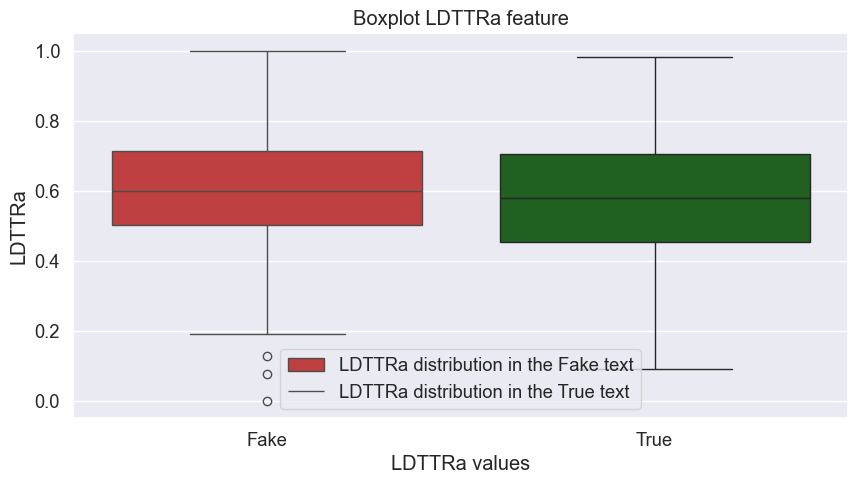

Linguistic feature: LDMTLD


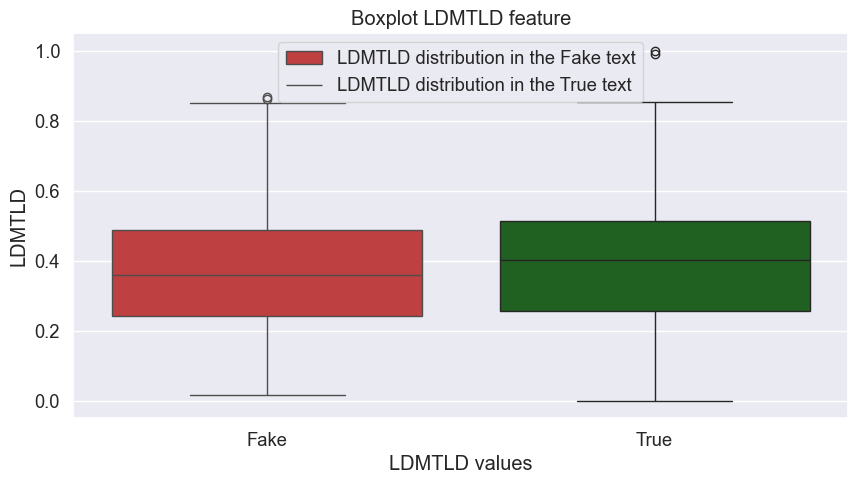

Linguistic feature: LDHDD


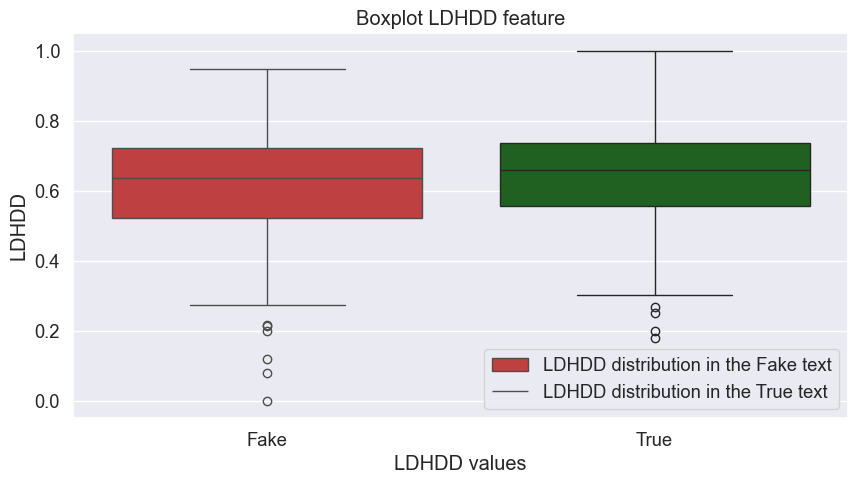

Linguistic feature: SYNLE


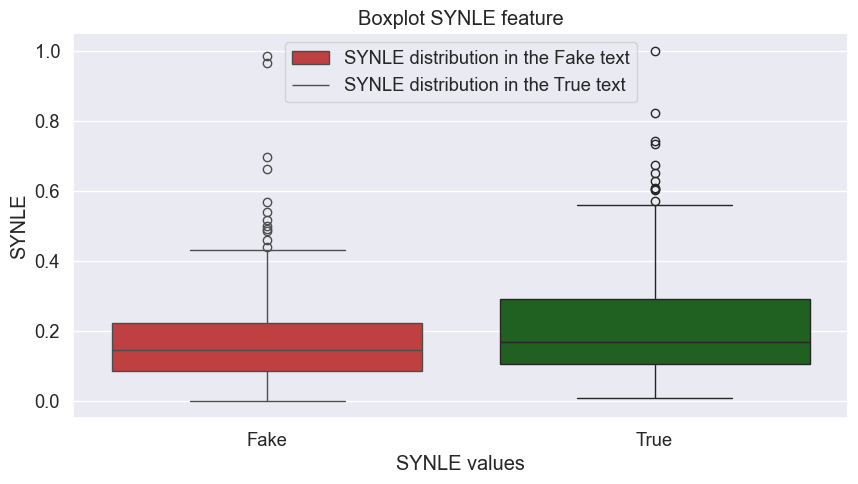

Linguistic feature: SYNNP


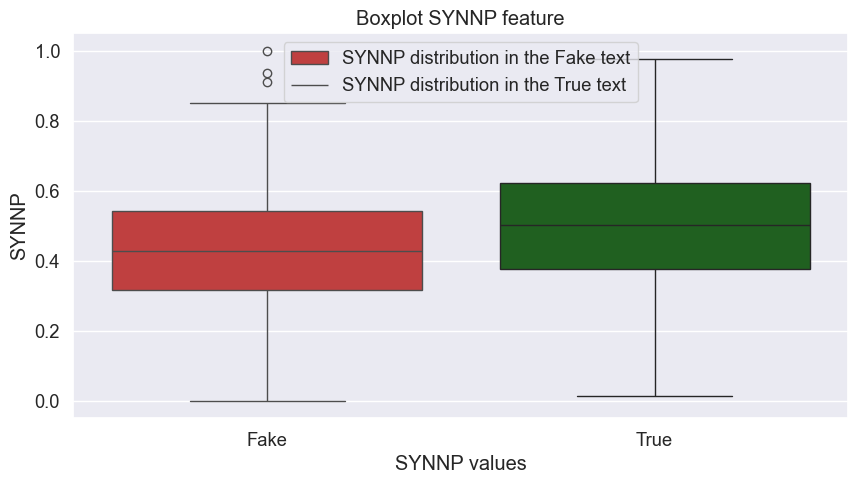

Linguistic feature: SYNMEDpos


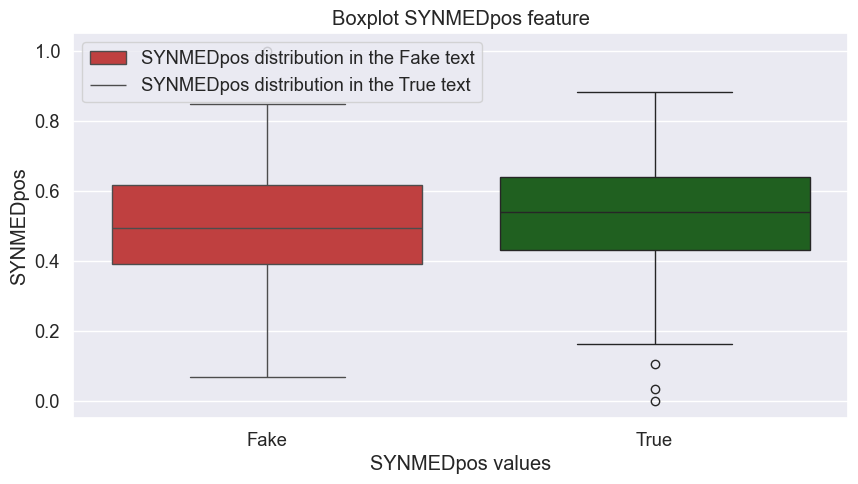

Linguistic feature: SYNMEDwrd


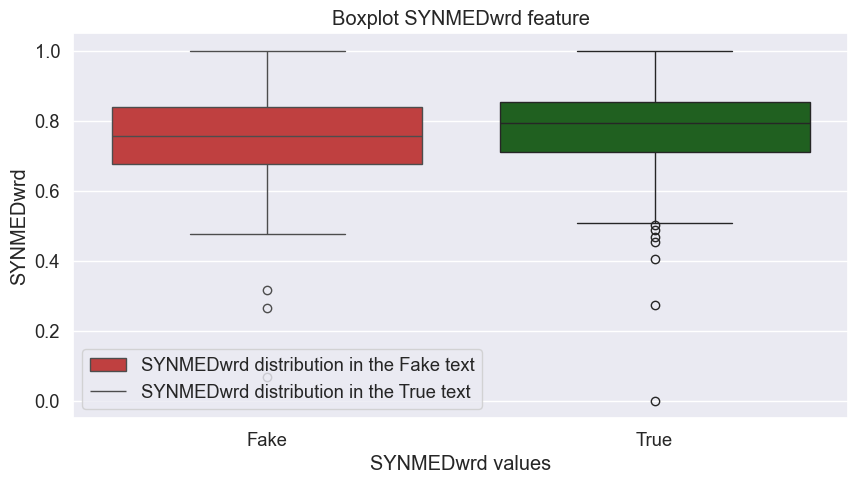

Linguistic feature: SYNMEDlem


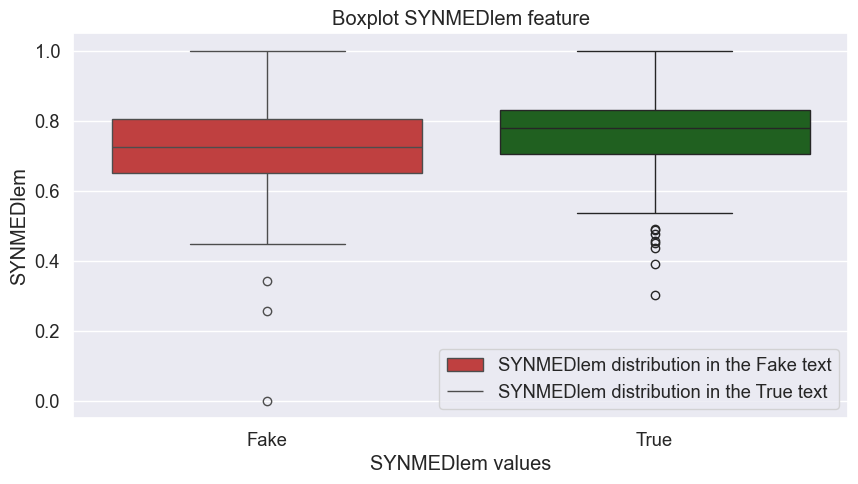

Linguistic feature: SYNSTRUTa


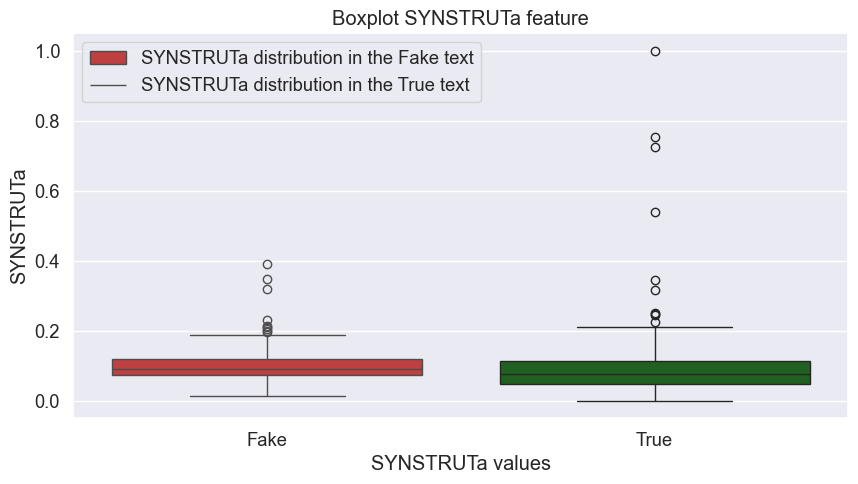

Linguistic feature: SYNSTRUTt
Linguistic feature: RDFRE


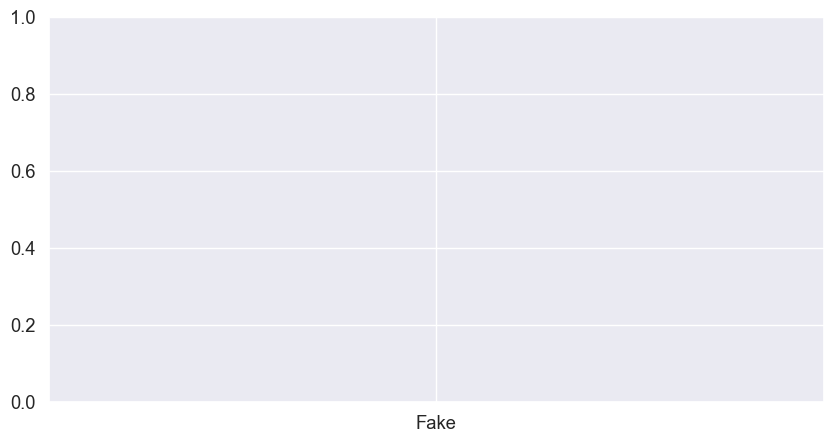

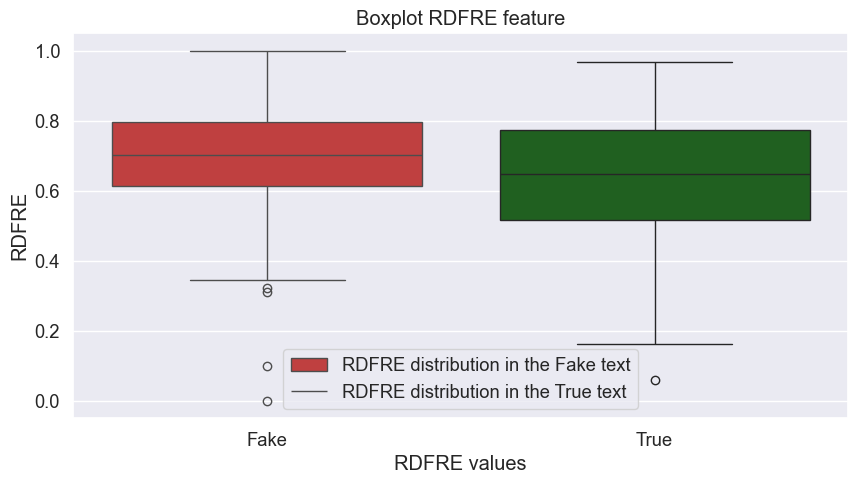

Linguistic feature: READFKGL


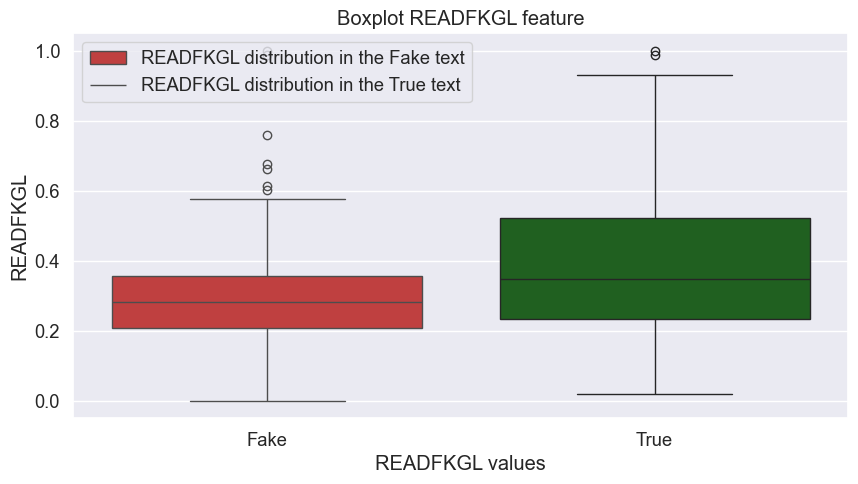

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_ALHPA


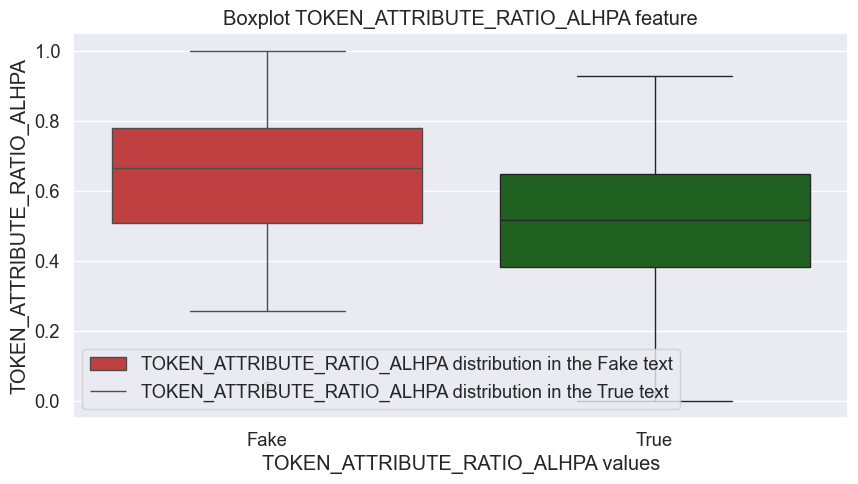

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_DIGIT


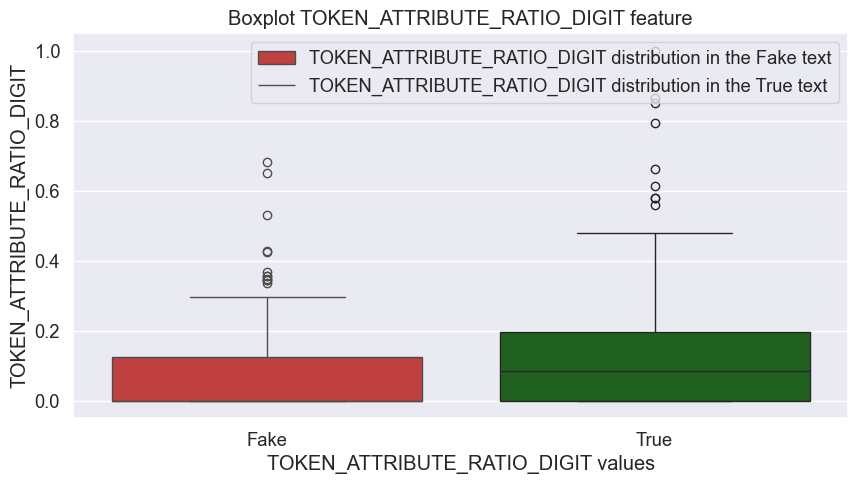

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_PUNCT


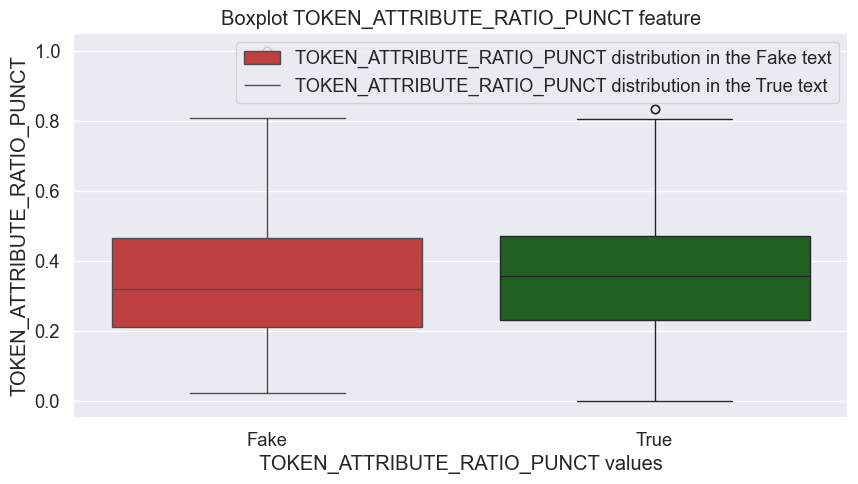

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_URL


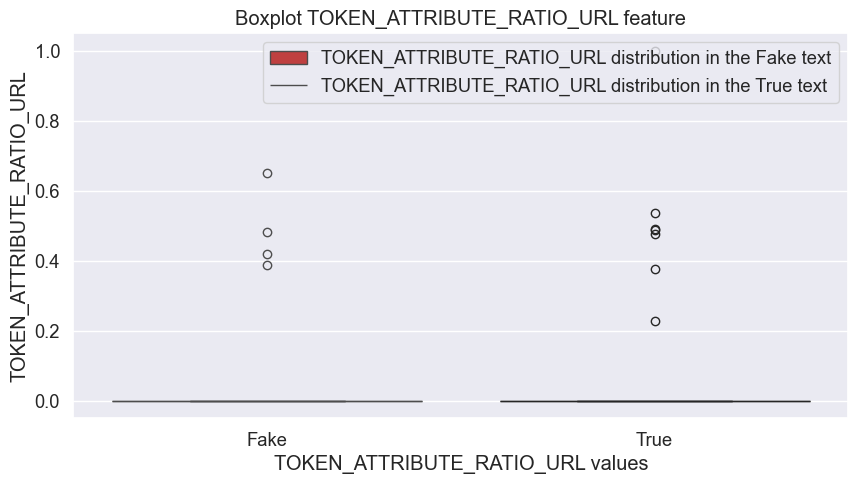

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_EMAIL
Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1s


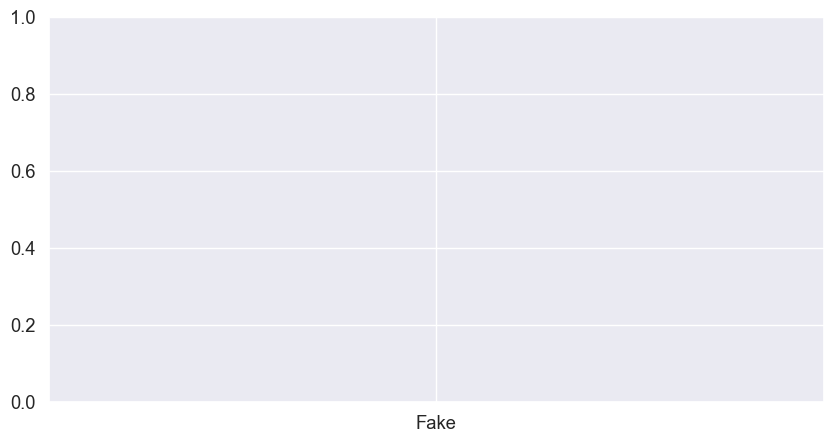

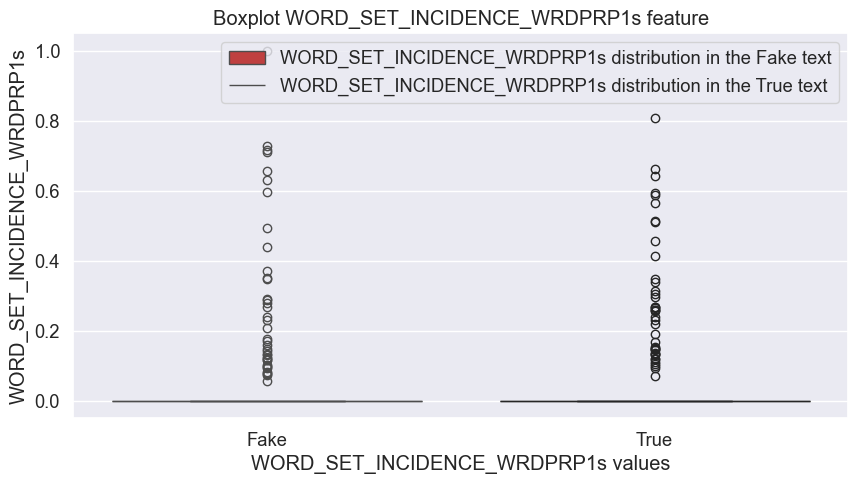

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1p


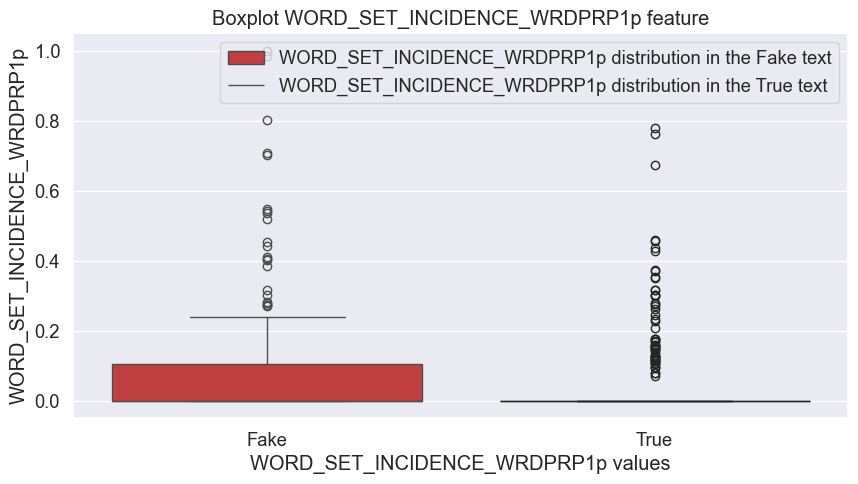

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP2


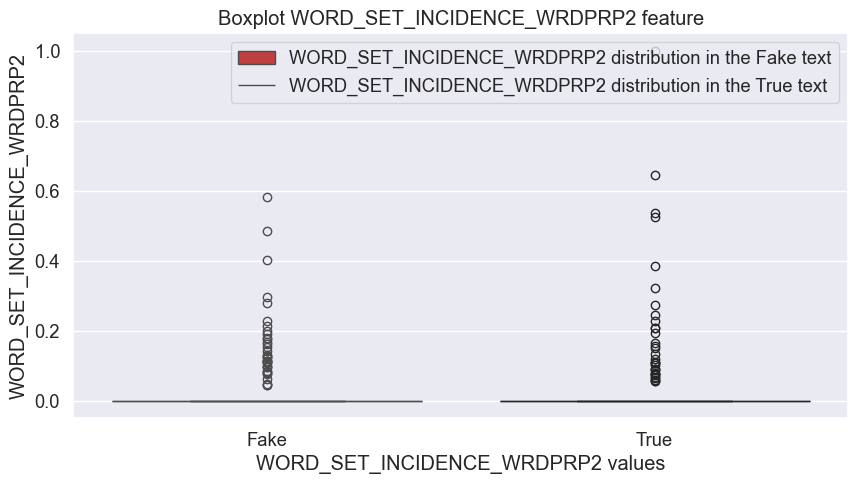

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3s


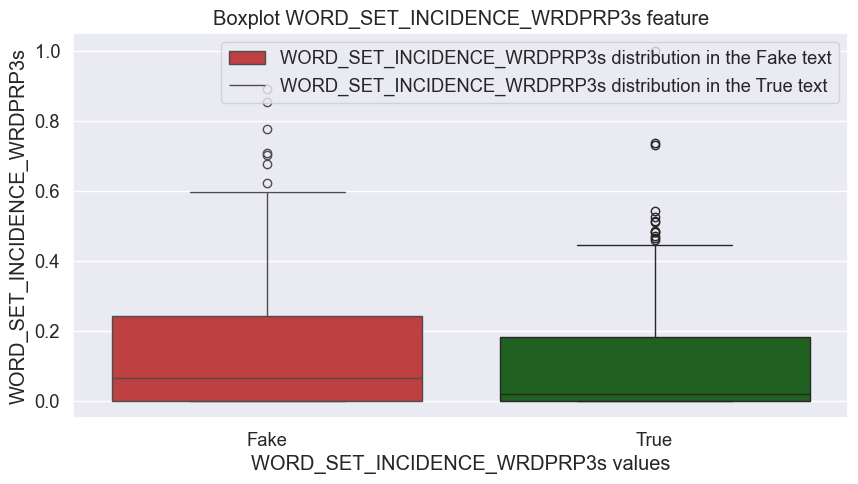

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3p


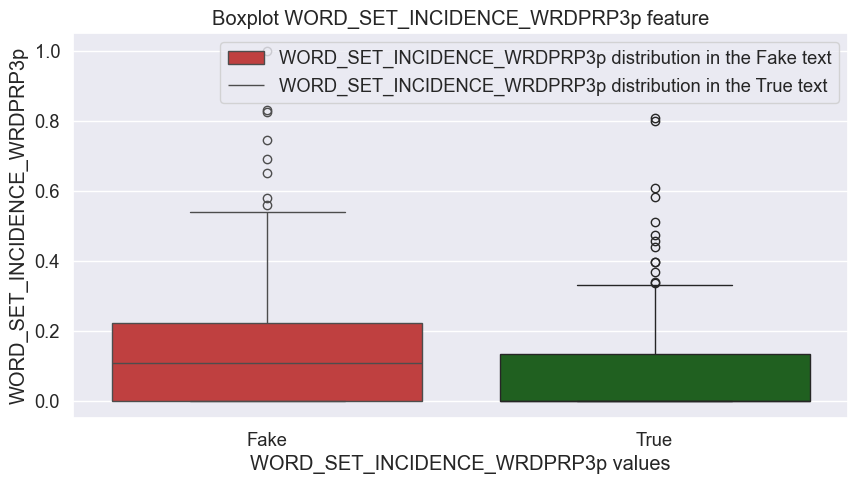

Linguistic feature: WORD_SET_INCIDENCE_CNCCaus


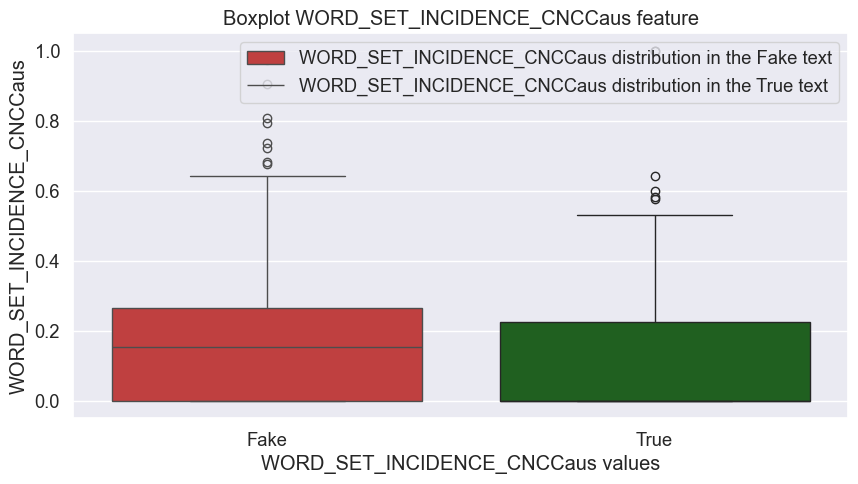

Linguistic feature: WORD_SET_INCIDENCE_CNCLogic


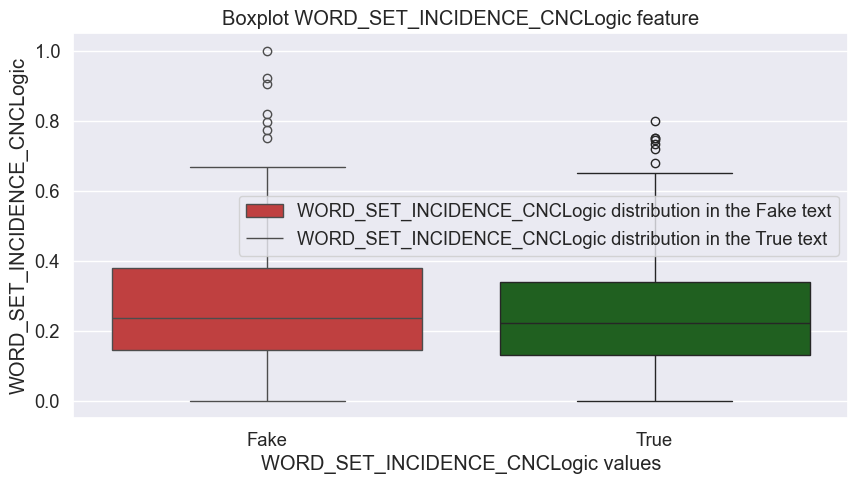

Linguistic feature: WORD_SET_INCIDENCE_CNCTemp


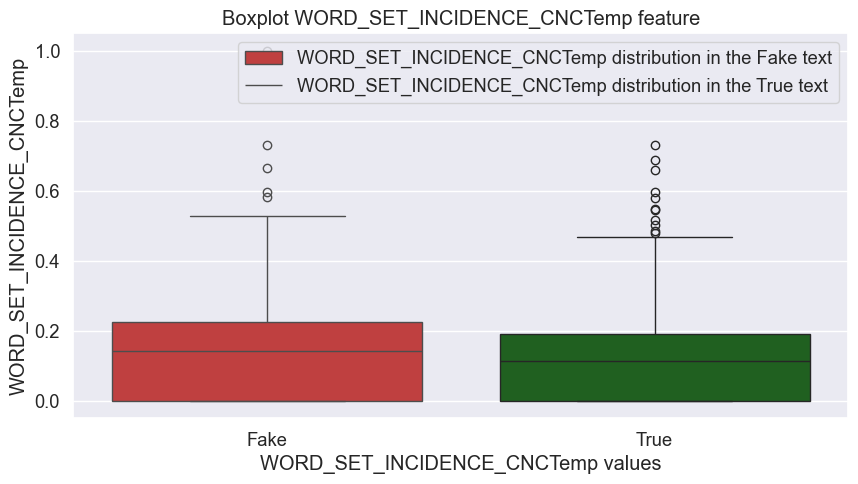

Linguistic feature: WORD_SET_INCIDENCE_CNCAdd


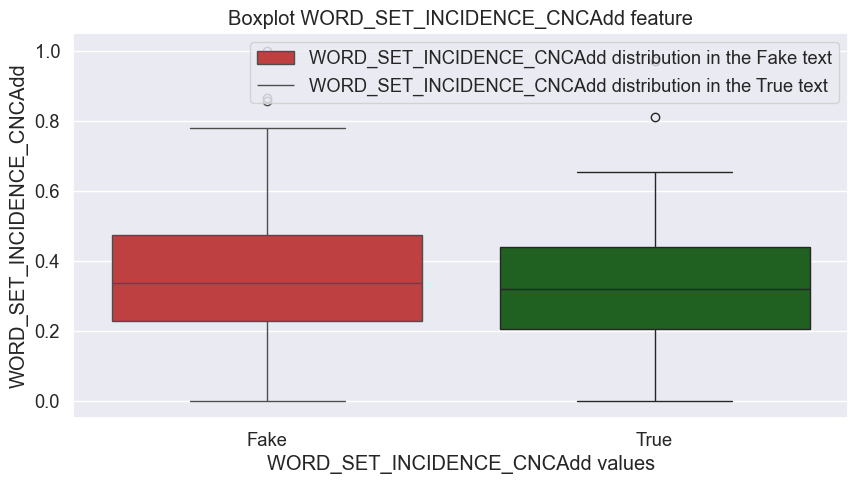

Linguistic feature: WORD_SET_INCIDENCE_CNCPos


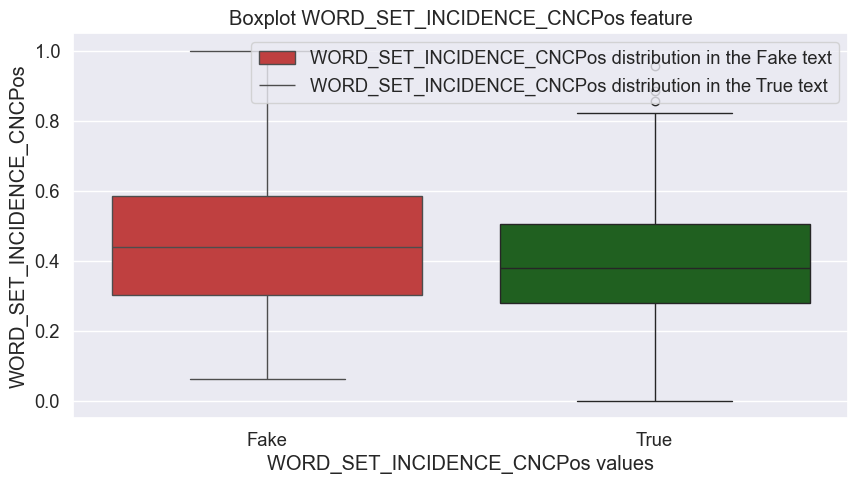

Linguistic feature: WORD_SET_INCIDENCE_CNCNeg


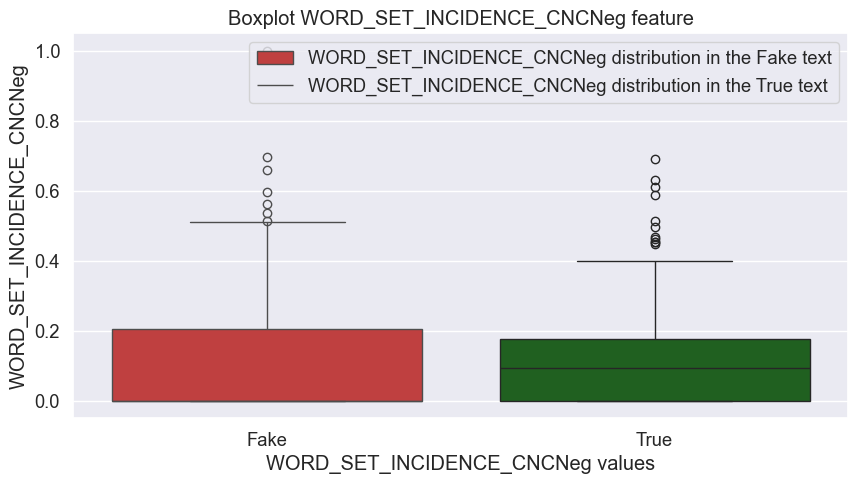

Linguistic feature: WORD_PROPERTY_WRDNOUN


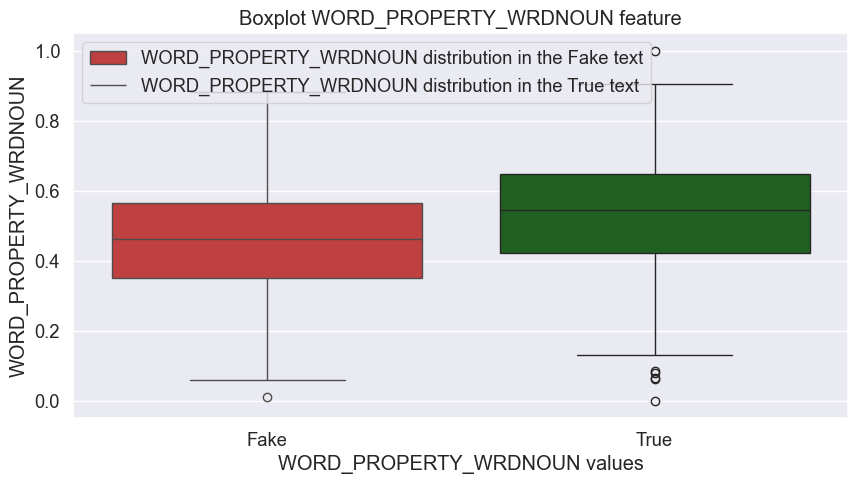

Linguistic feature: WORD_PROPERTY_WRDVERB


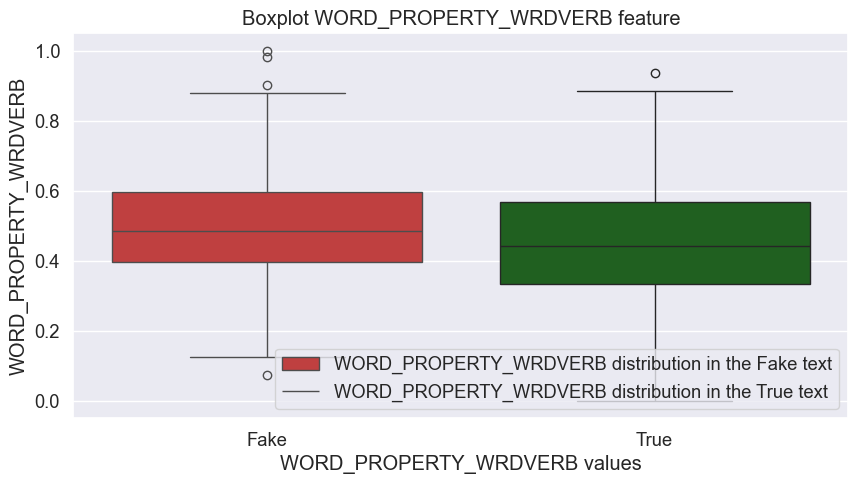

Linguistic feature: WORD_PROPERTY_WRDADJ


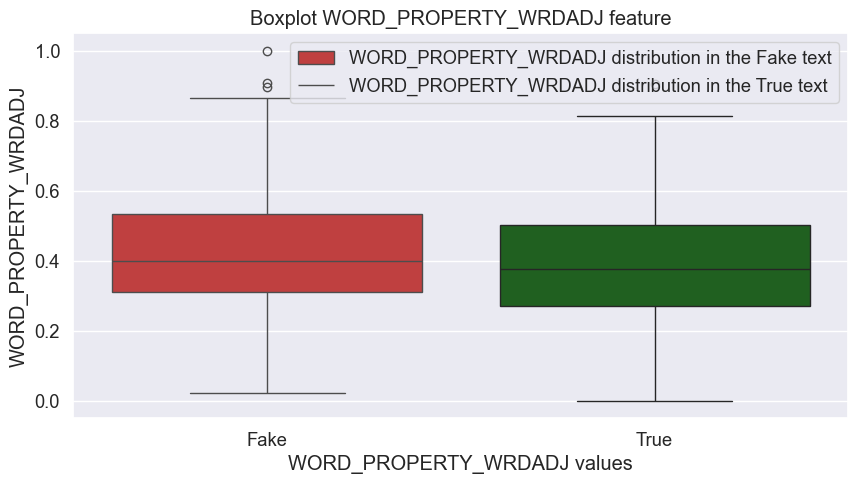

Linguistic feature: WORD_PROPERTY_WRDADV


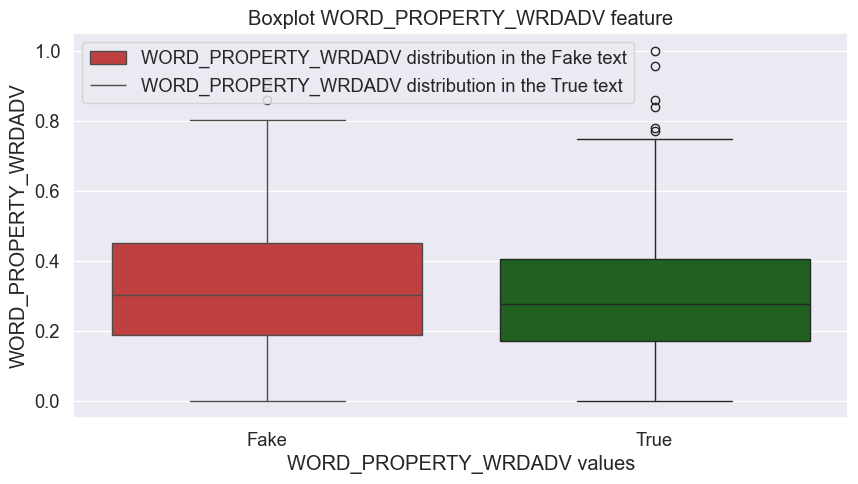

Linguistic feature: WORD_PROPERTY_WRDFRQc


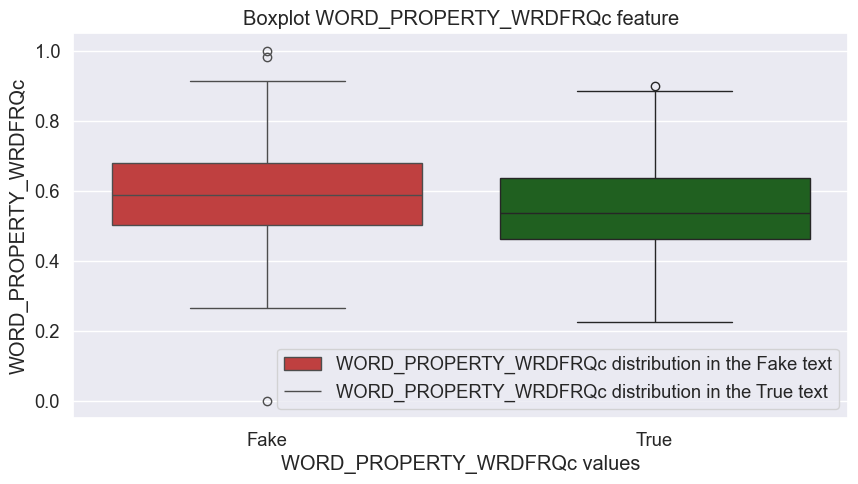

Linguistic feature: WORD_PROPERTY_WRDFRQa


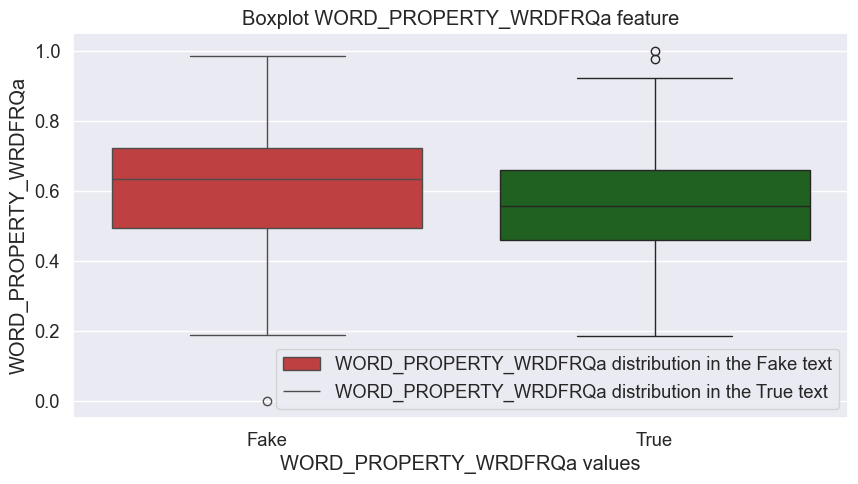

Linguistic feature: WORD_PROPERTY_WRDFRQmc


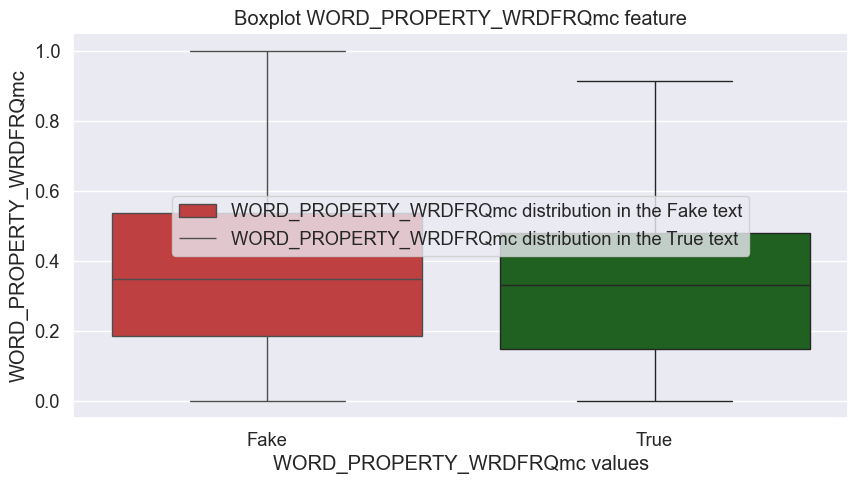

Linguistic feature: WORD_PROPERTY_WRDFAMc


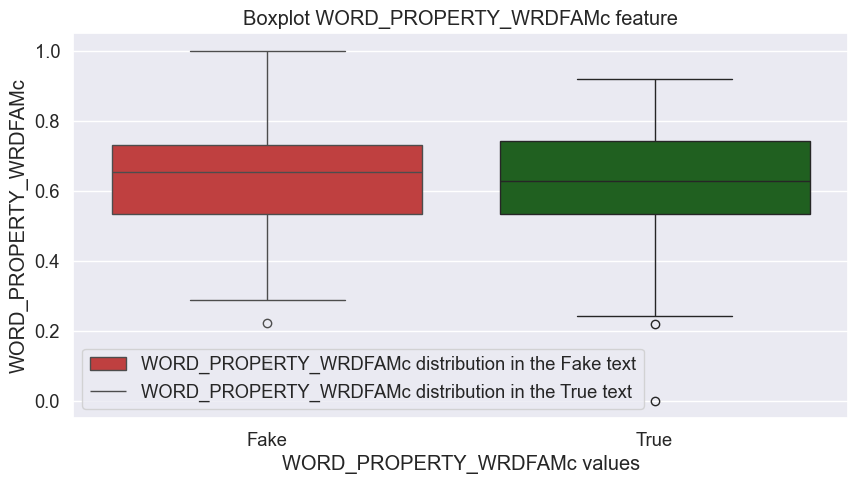

Linguistic feature: WORD_PROPERTY_WRDCNCc


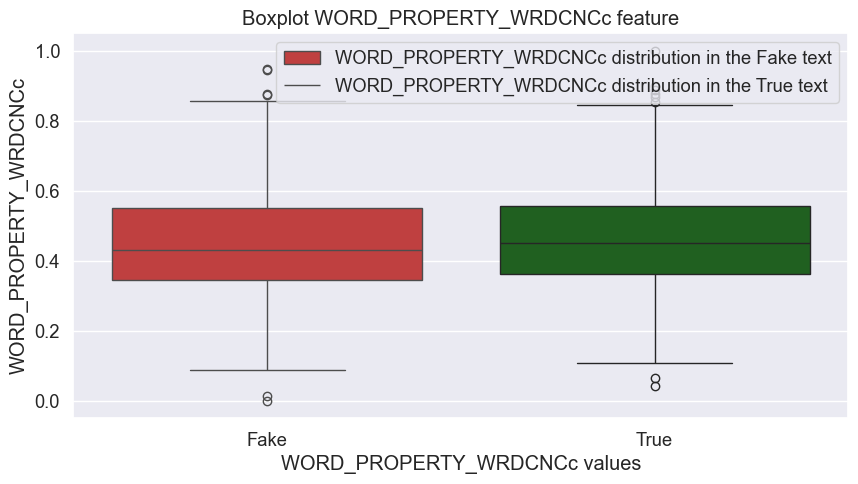

Linguistic feature: WORD_PROPERTY_WRDIMGc


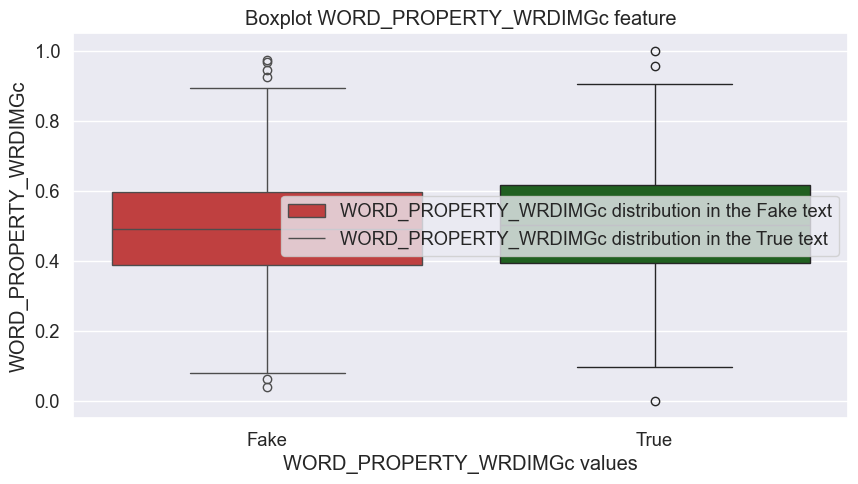

Linguistic feature: WORD_PROPERTY_WRDMEAc


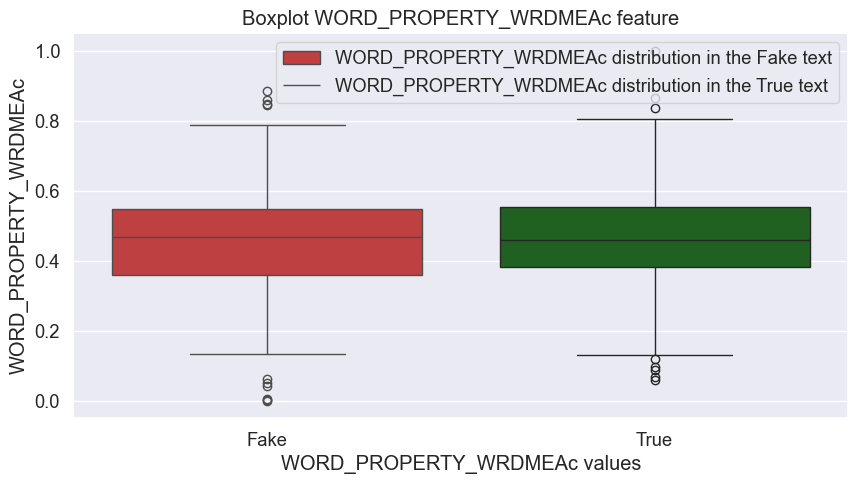

Linguistic feature: WORD_PROPERTY_WRDPOLc


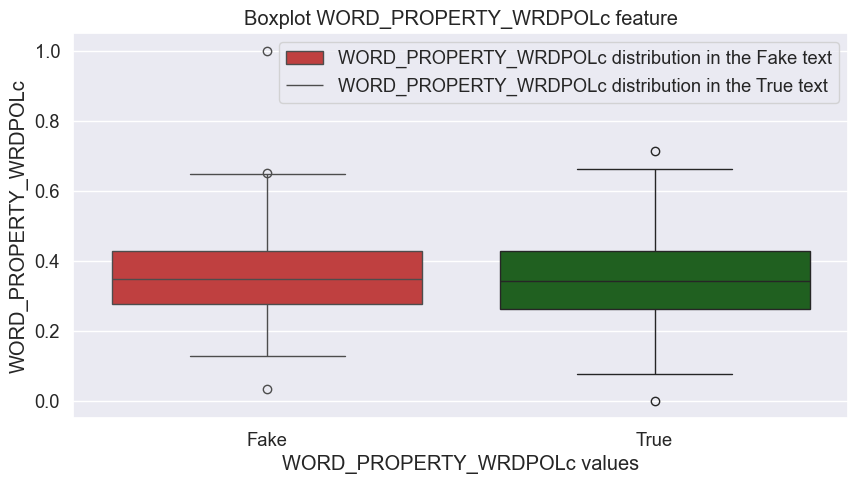

Linguistic feature: WORD_PROPERTY_WRDHYPn


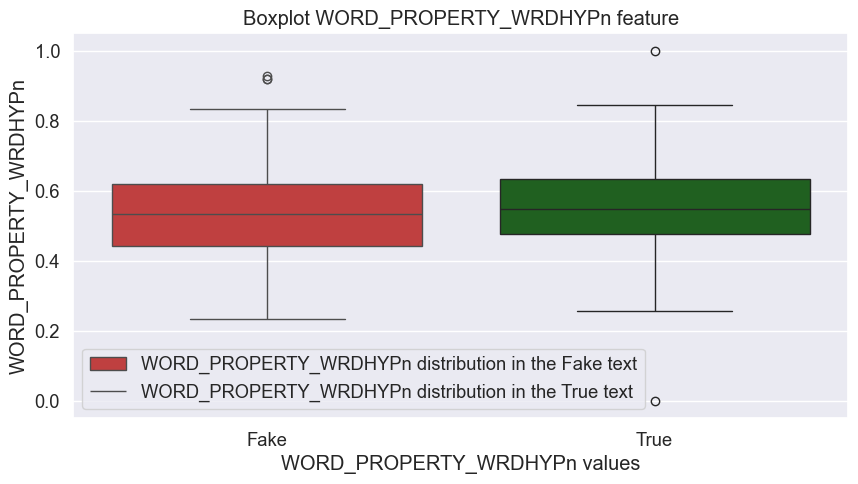

Linguistic feature: WORD_PROPERTY_WRDHYPv


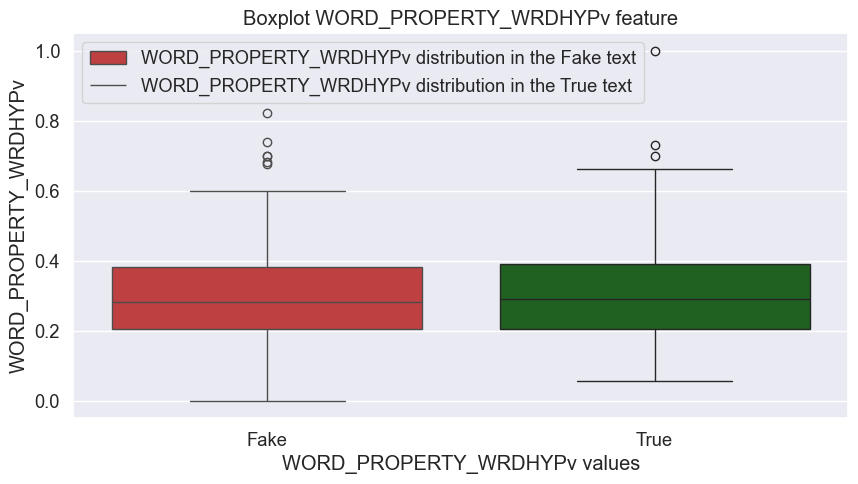

Linguistic feature: WORD_PROPERTY_WRDHYPnv


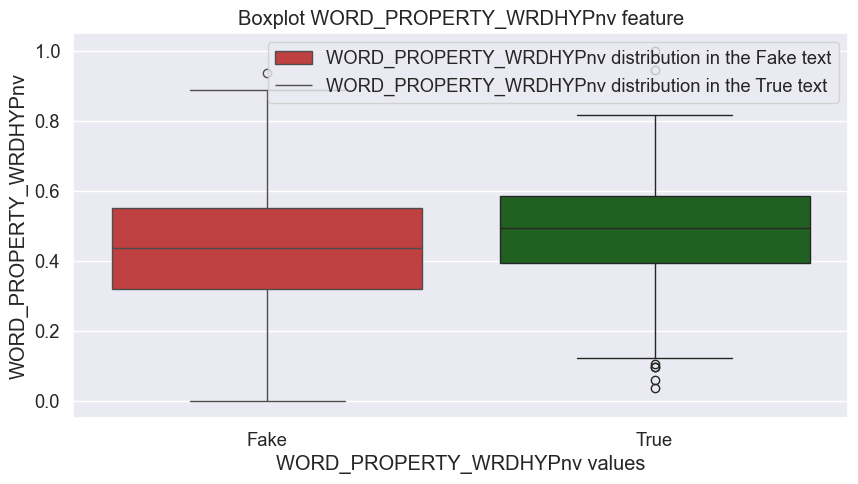

Linguistic feature: WORD_PROPERTY_AOA


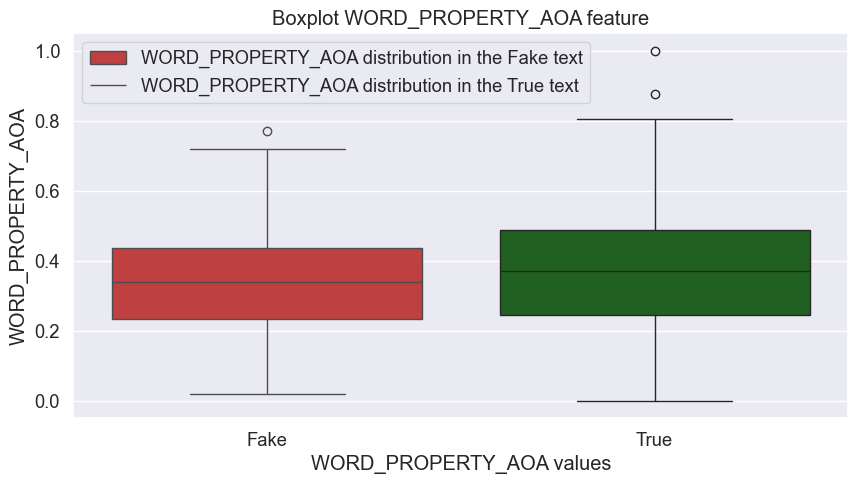

Linguistic feature: WORD_PROPERTY_AOA_MAX


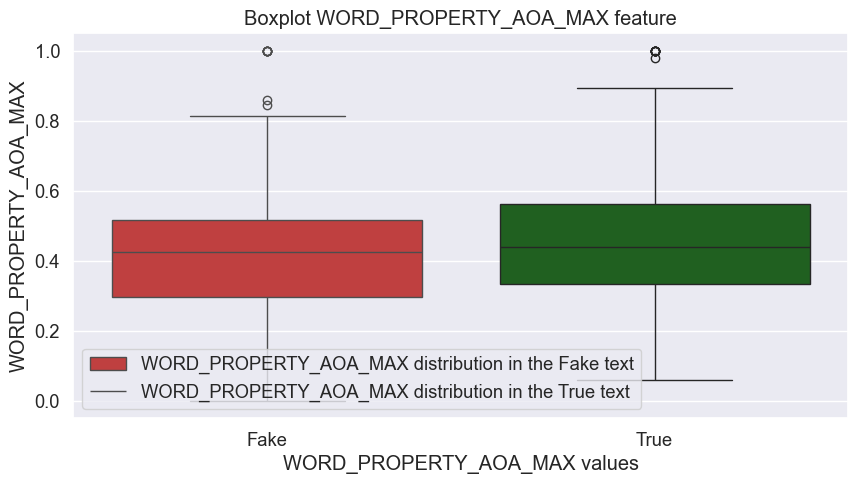

Linguistic feature: WORD_PROPERTY_CONCRETENESS


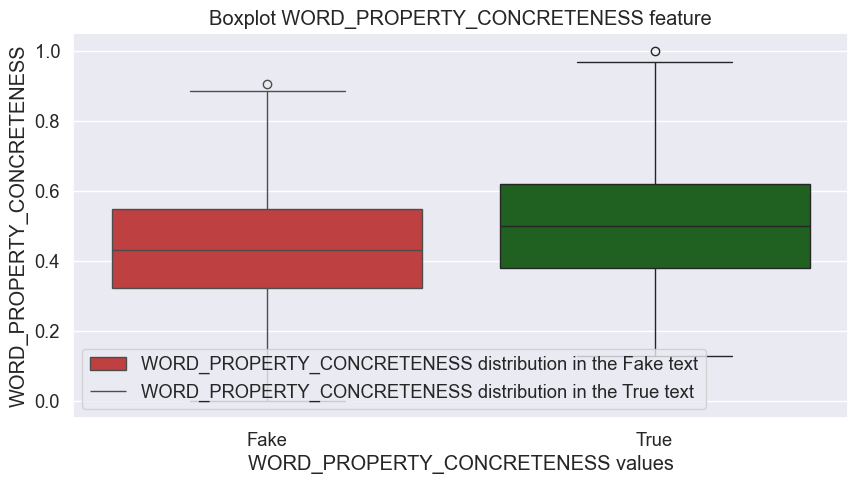

Linguistic feature: WORD_PROPERTY_PREVALENCE


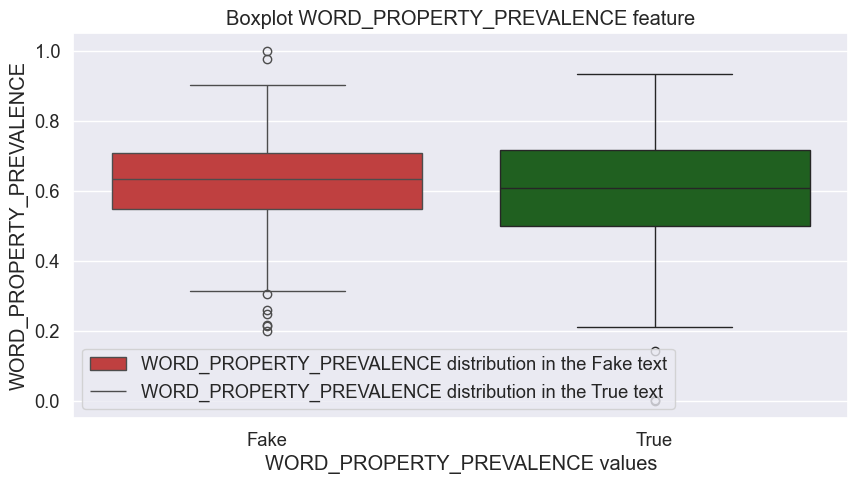

Linguistic feature: WORD_PROPERTY_PREVALENCE_MIN


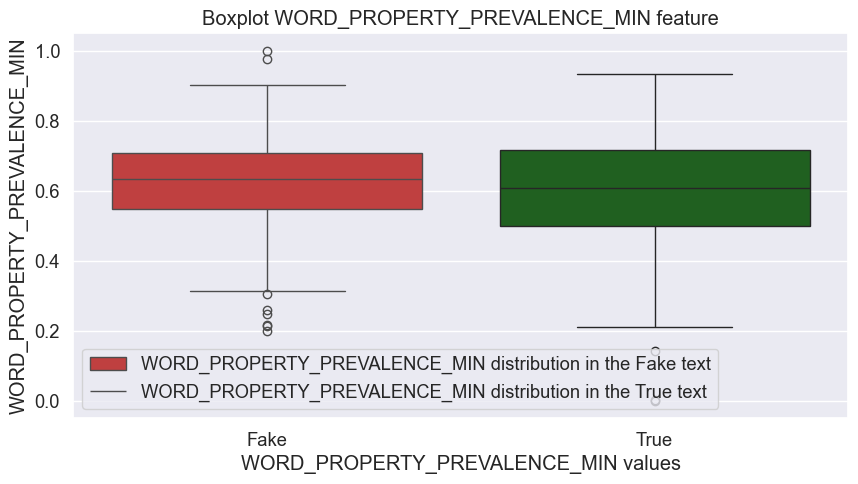

Linguistic feature: WORD_SET_INCIDENCE_C4_COMMON_WORDS


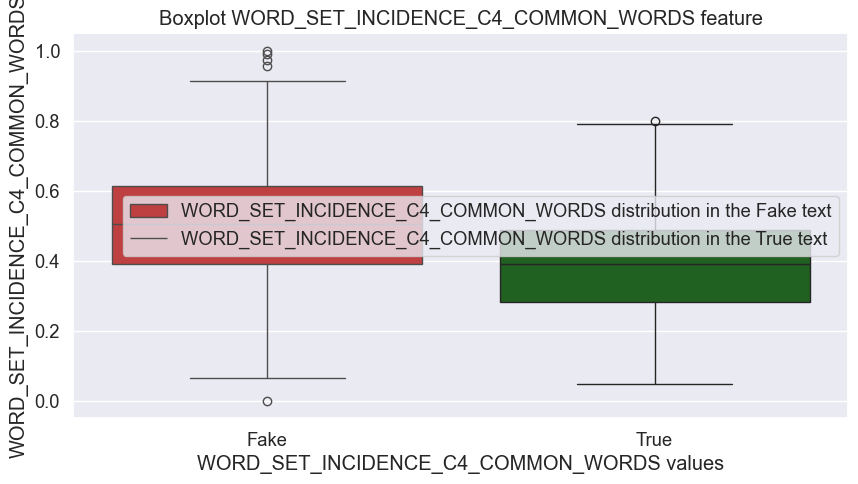

Linguistic feature: Polarity


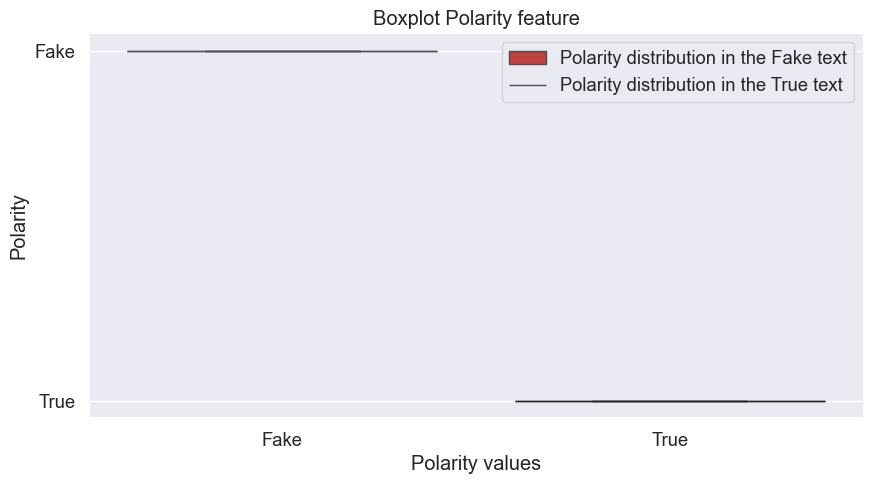

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_scaled:
  try: 
    print("Linguistic feature:", col)

    target_fake = df_scaled[df_scaled['Polarity'] == "Fake"]
    target_true = df_scaled[df_scaled['Polarity'] == "True"]



    fig, ax = plt.subplots(figsize=(10, 5))
    sns.set_theme(style='darkgrid', font_scale=1.2)
    sns.boxplot(target_fake, y=target_fake[col], x="Polarity", color="red", saturation=0.5, fill=True)
    sns.boxplot(target_true, y=target_true[col], x="Polarity", color="green", saturation=0.5, fill=True)       

    
    plt.title("Boxplot {} feature".format(col))
    plt.legend(labels = ["{} distribution in the Fake text".format(col), "{} distribution in the True text".format(col)])
    plt.xlabel("{} values".format(col))

    plt.show()
  except:
    continue

Linguistic feature: DESPC


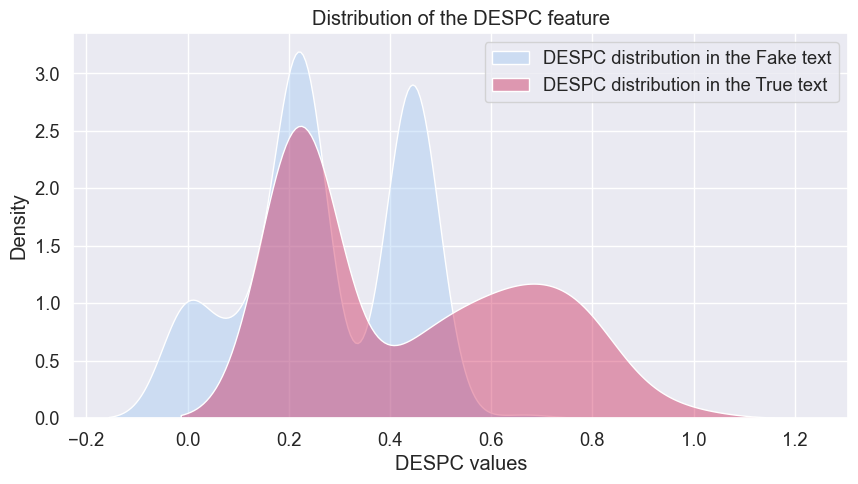

Linguistic feature: DESSC


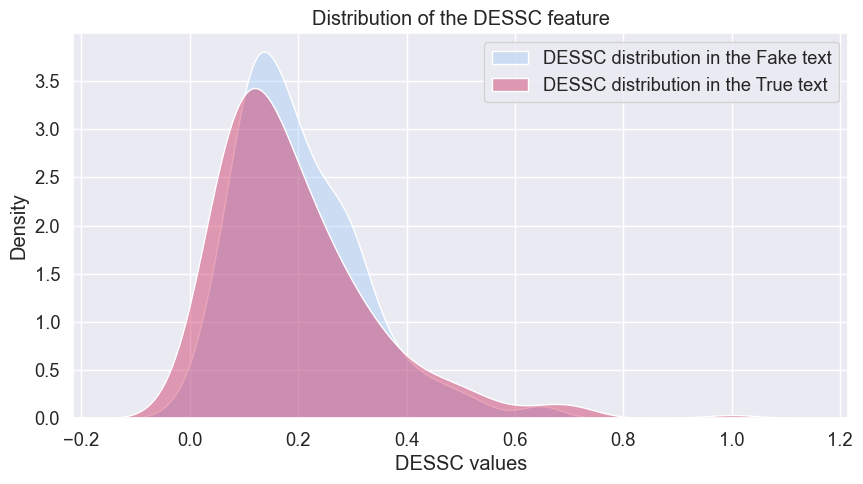

Linguistic feature: DESWC


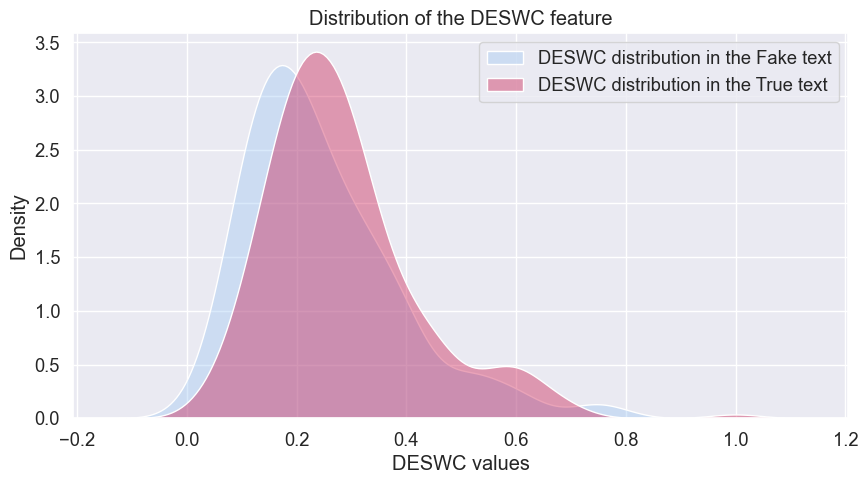

Linguistic feature: DESPL


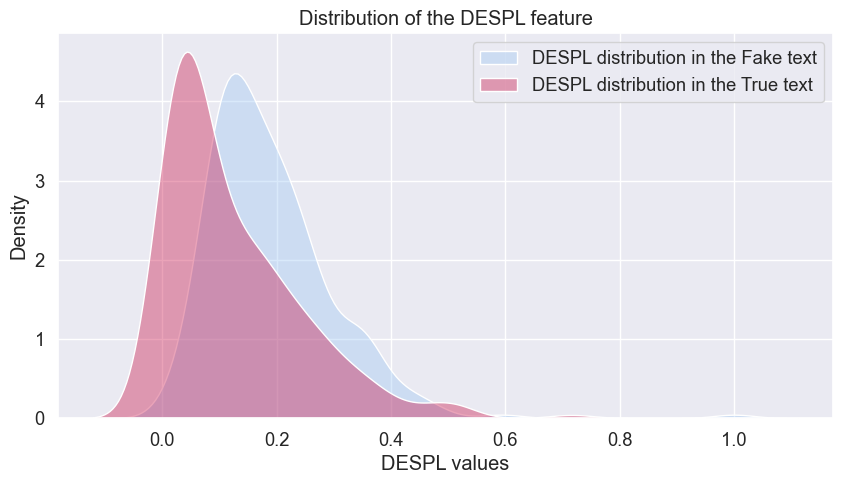

Linguistic feature: DESPLd


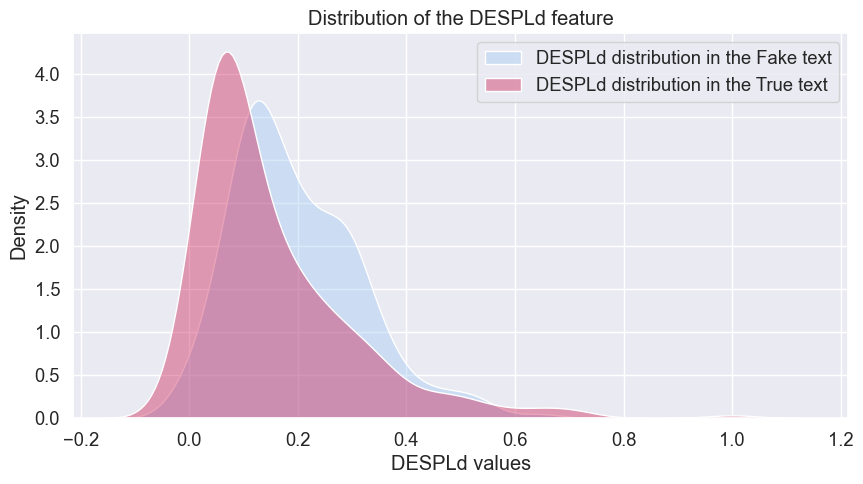

Linguistic feature: DESPLw


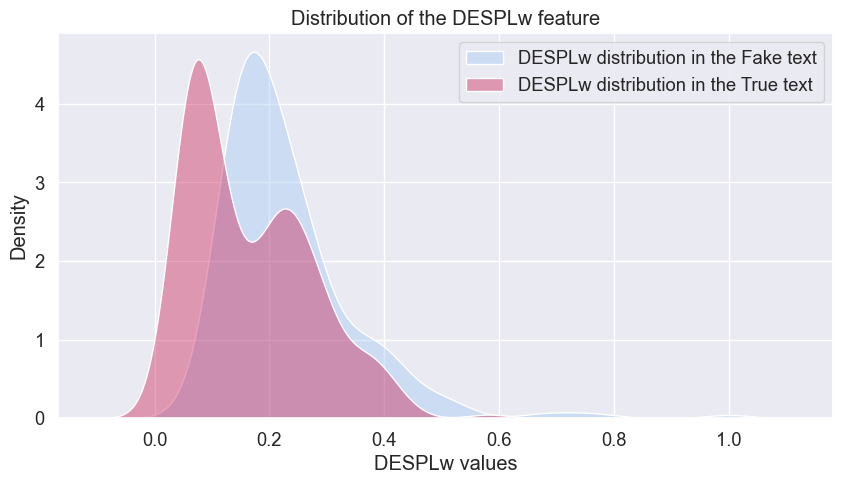

Linguistic feature: DESSL


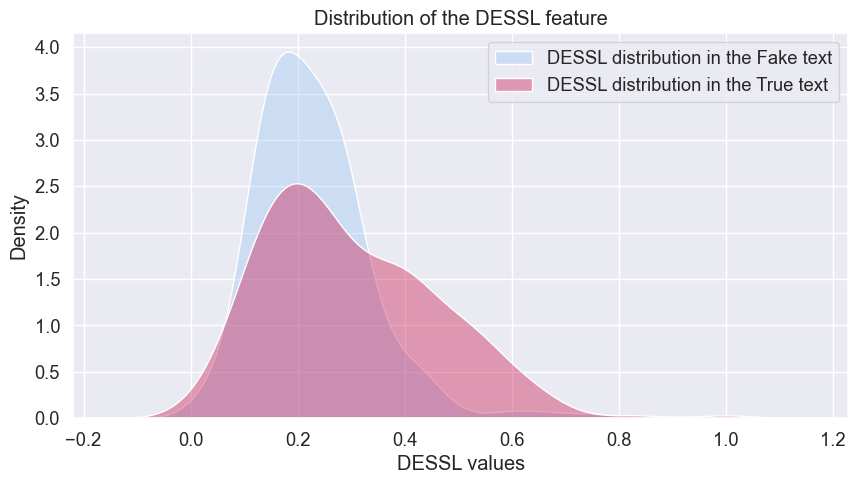

Linguistic feature: DESSLd


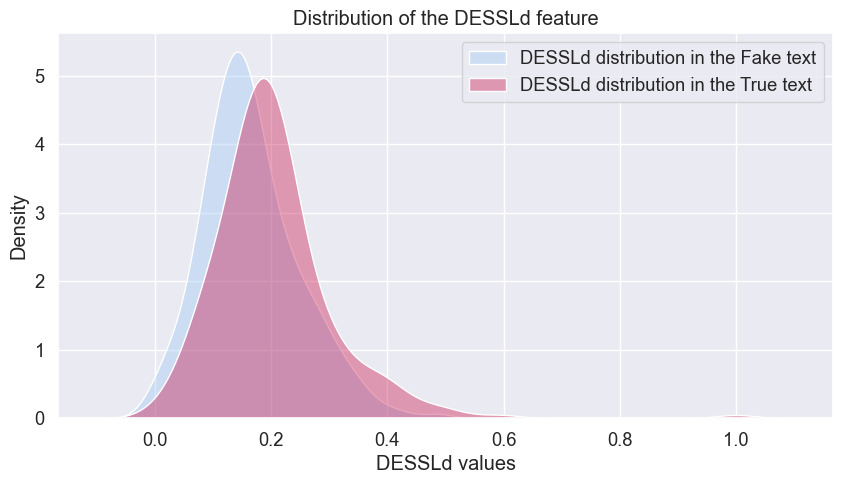

Linguistic feature: DESWLsy


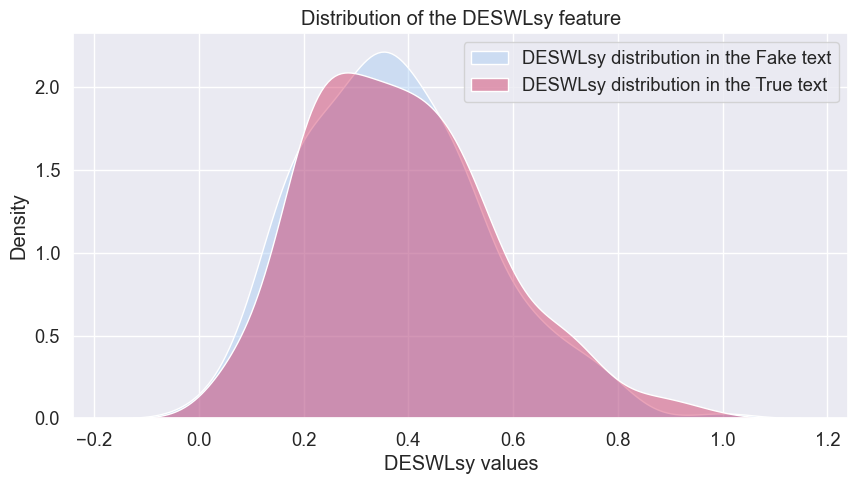

Linguistic feature: DESWLsyd


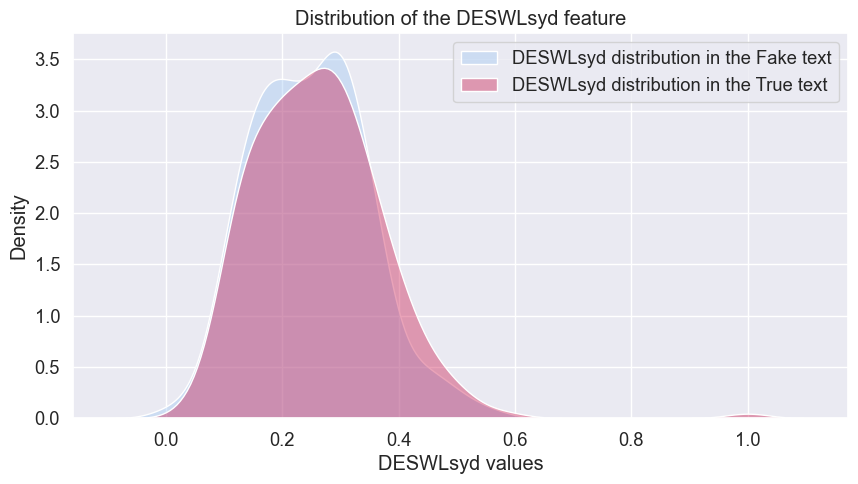

Linguistic feature: DESWLlt


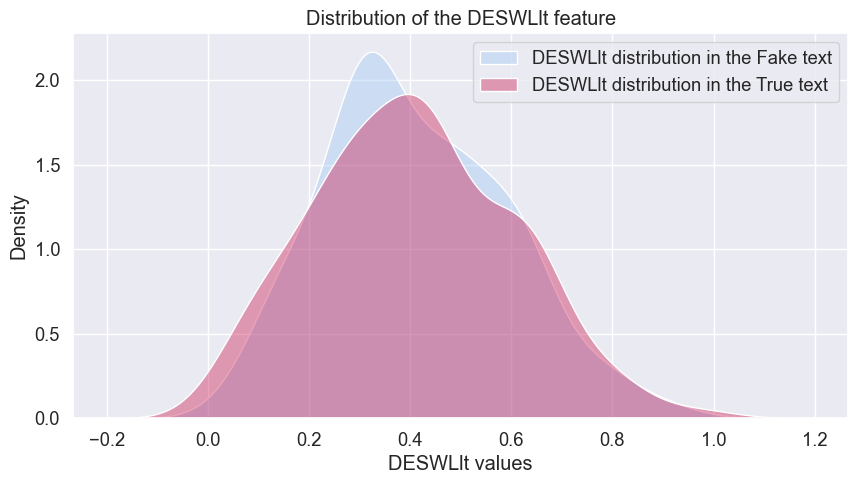

Linguistic feature: DESWLltd


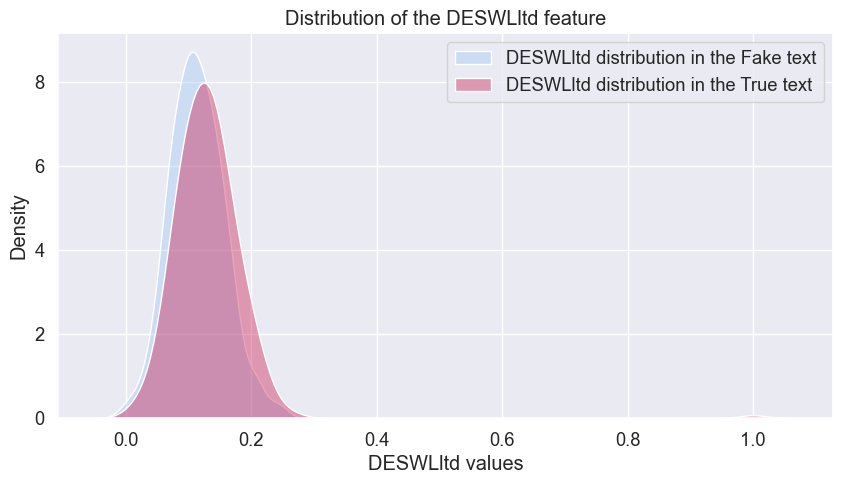

Linguistic feature: LDTTRc


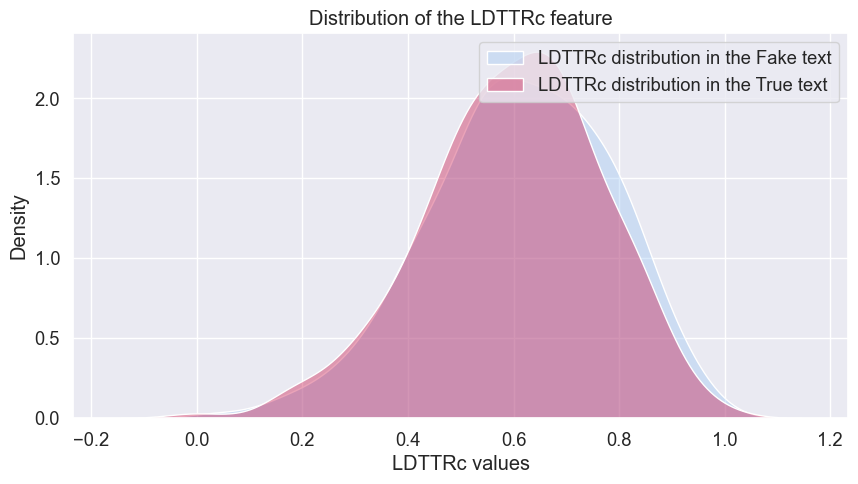

Linguistic feature: LDTTRa


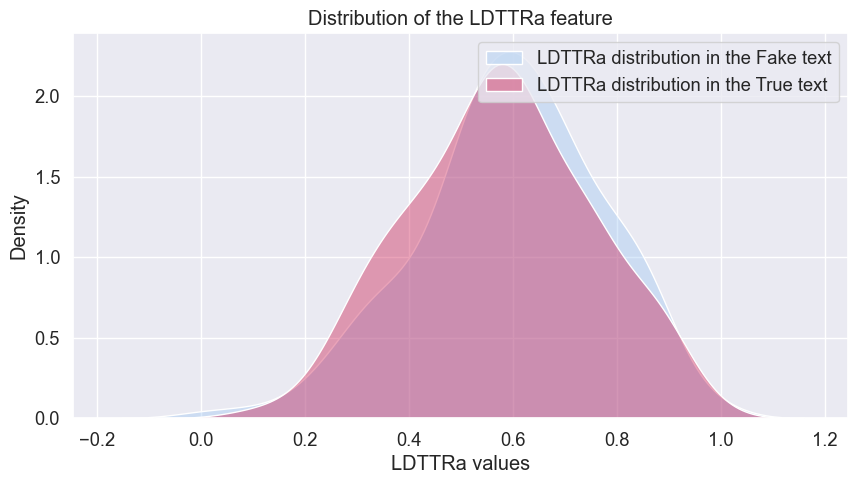

Linguistic feature: LDMTLD


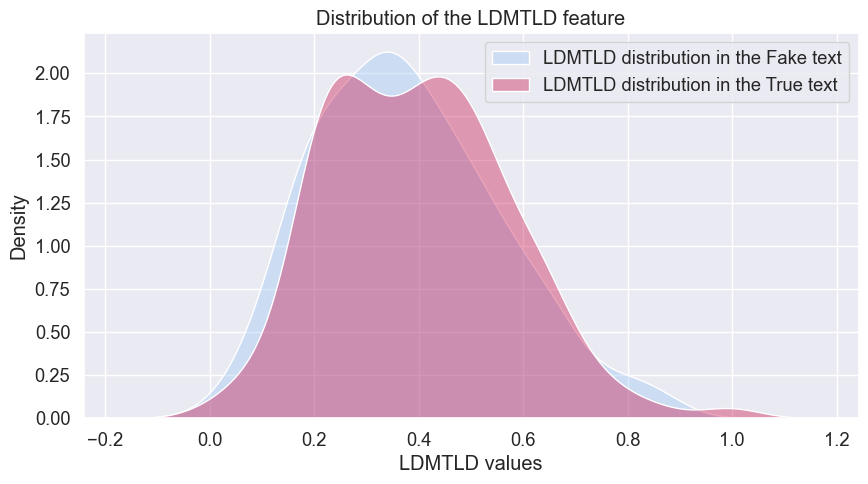

Linguistic feature: LDHDD


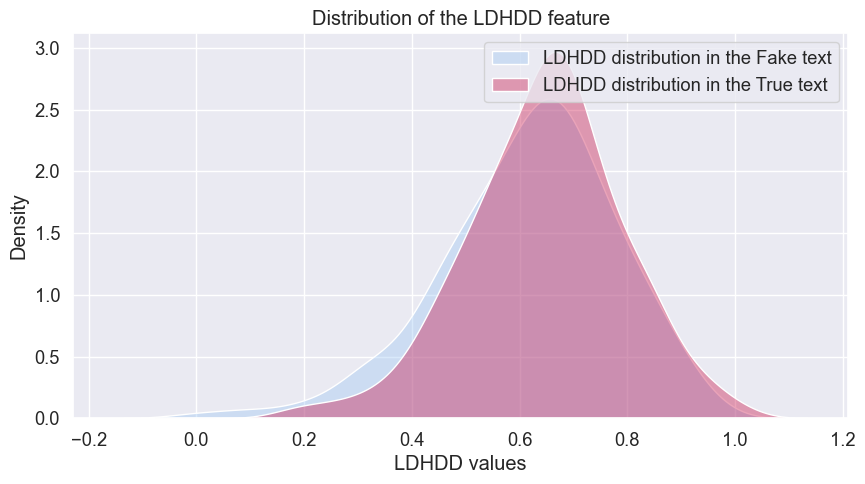

Linguistic feature: SYNLE


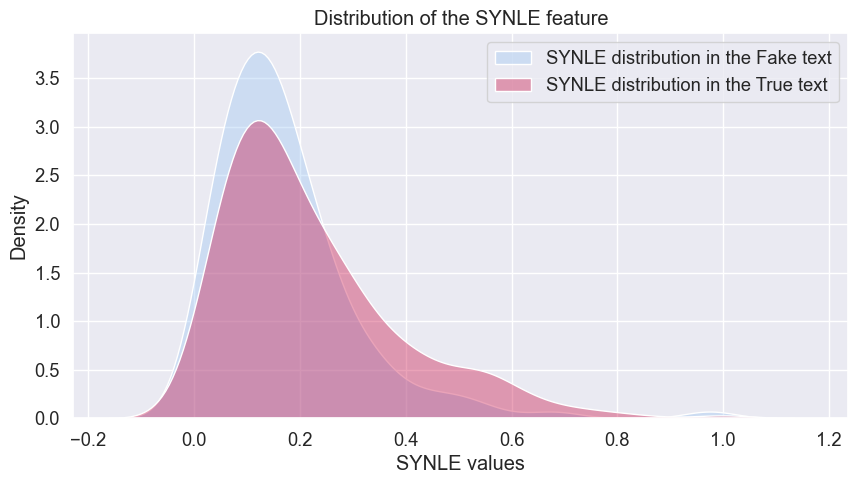

Linguistic feature: SYNNP


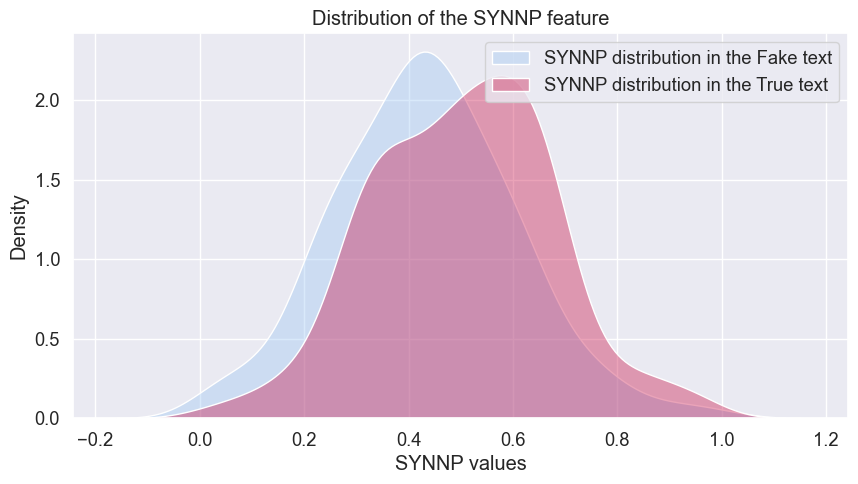

Linguistic feature: SYNMEDpos


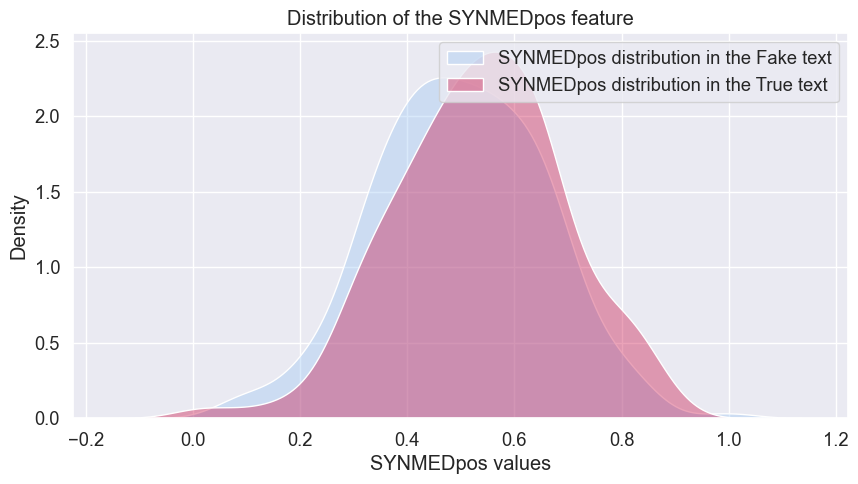

Linguistic feature: SYNMEDwrd


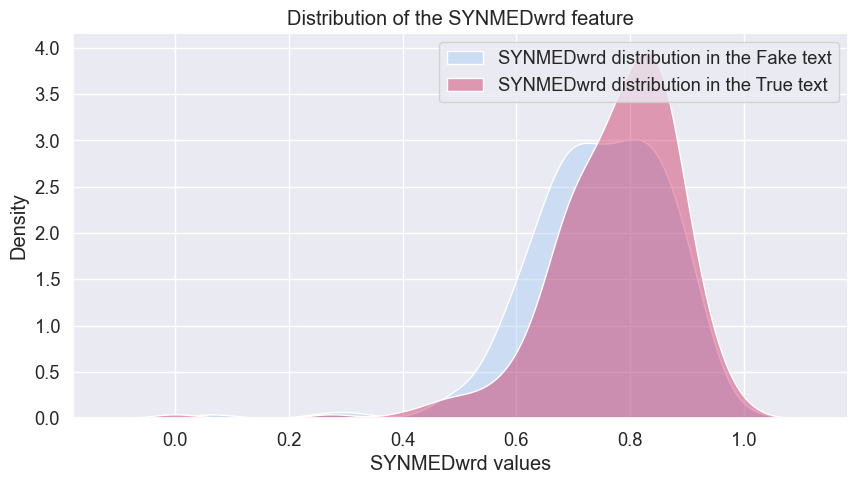

Linguistic feature: SYNMEDlem


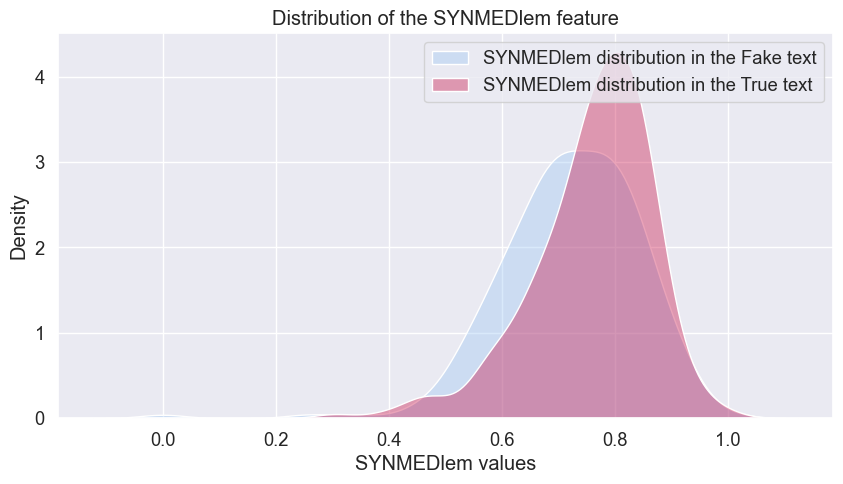

Linguistic feature: SYNSTRUTa


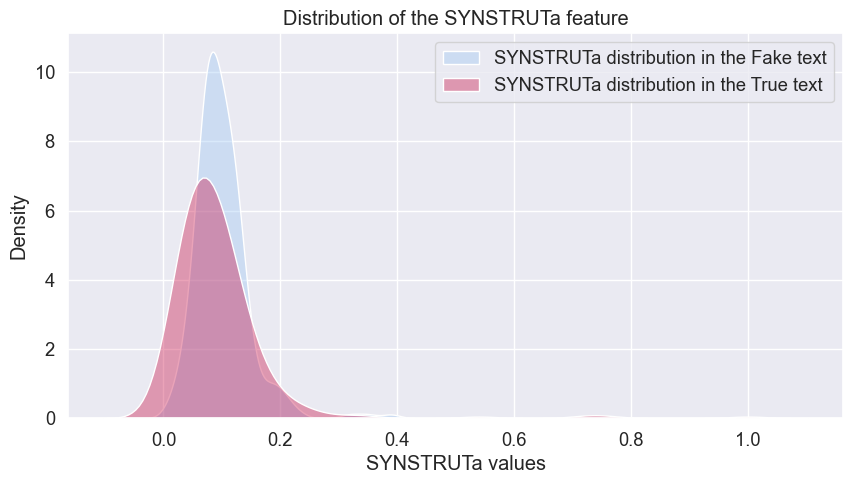

Linguistic feature: SYNSTRUTt
Linguistic feature: RDFRE


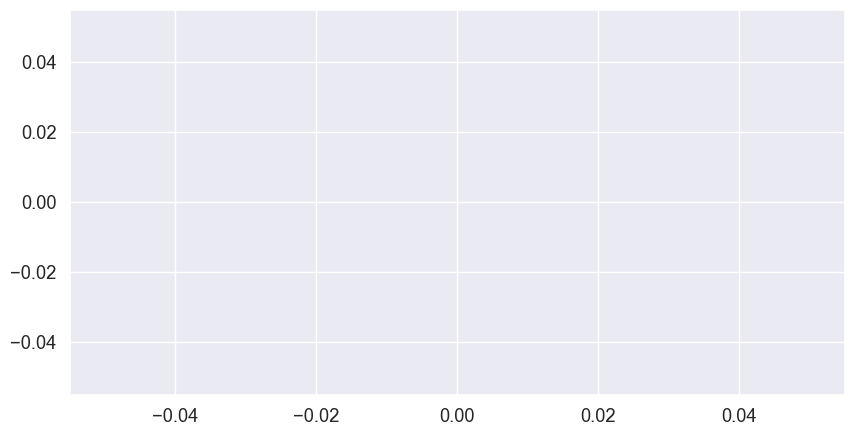

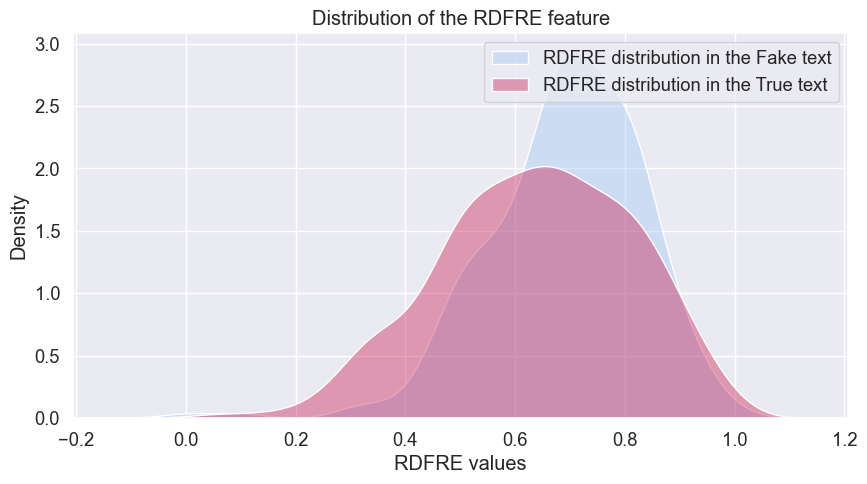

Linguistic feature: READFKGL


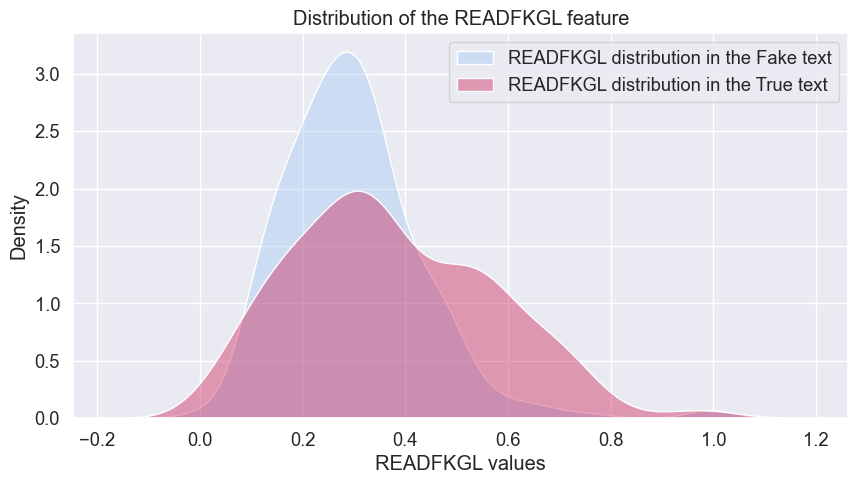

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_ALHPA


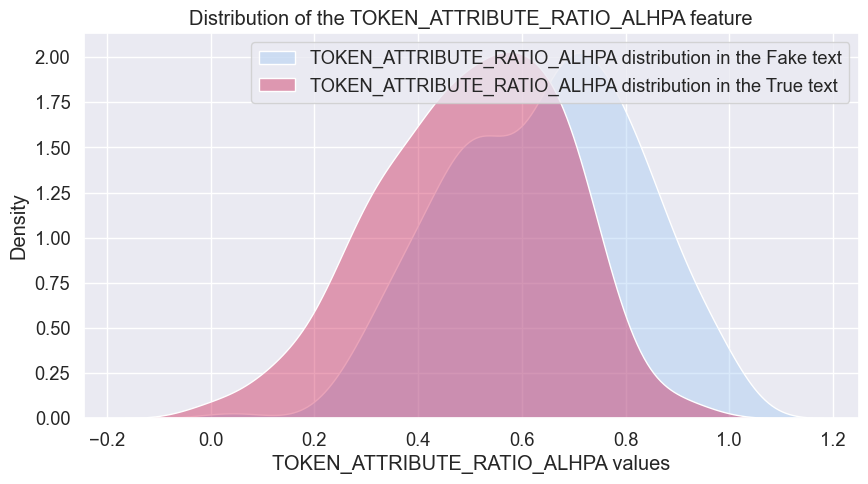

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_DIGIT


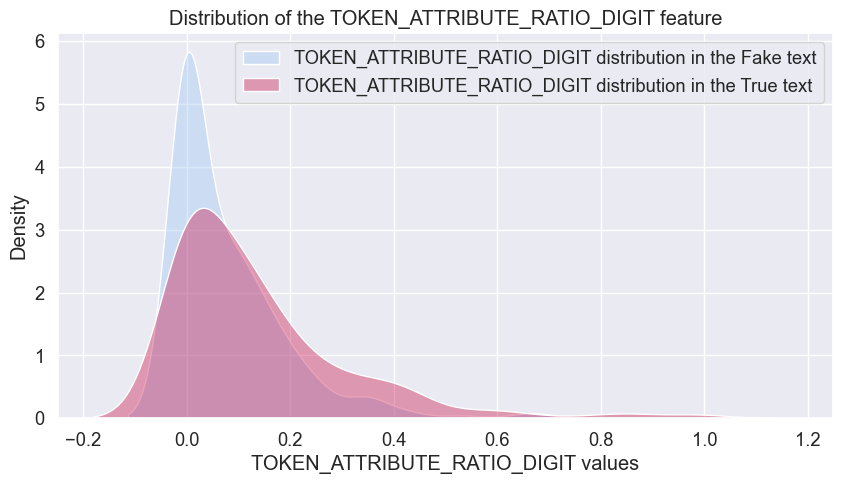

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_PUNCT


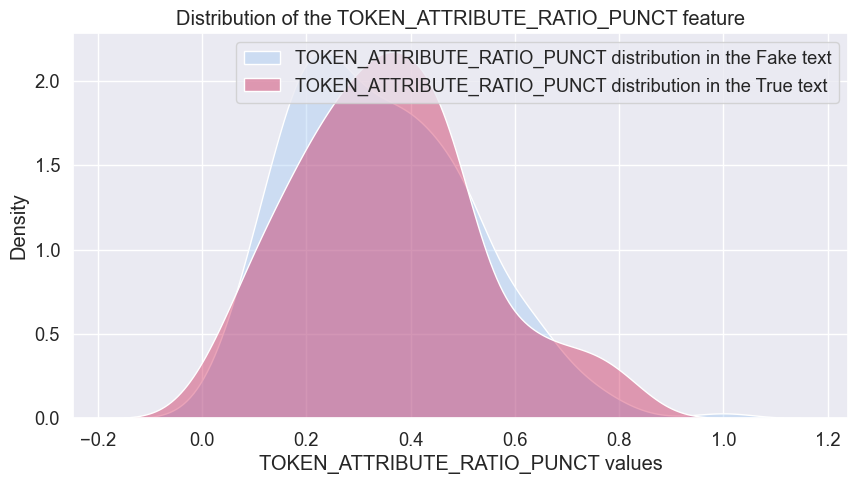

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_URL


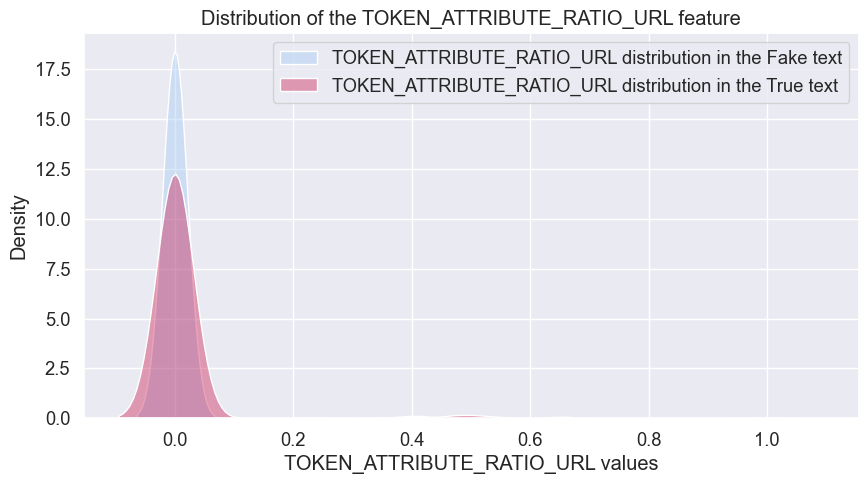

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_EMAIL
Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1s


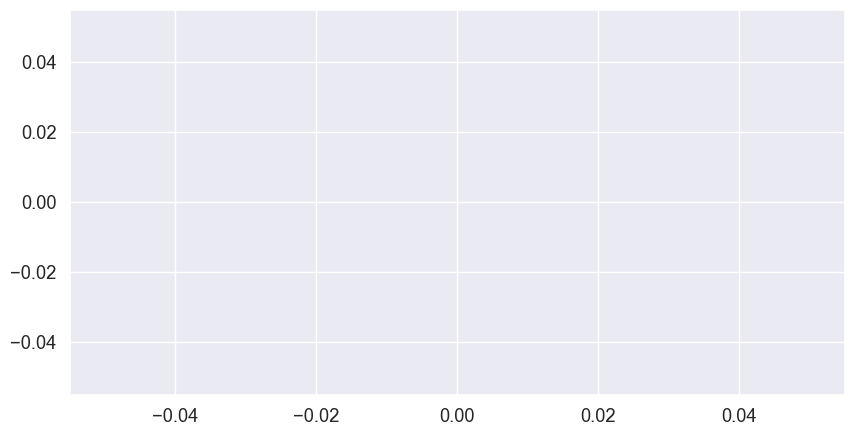

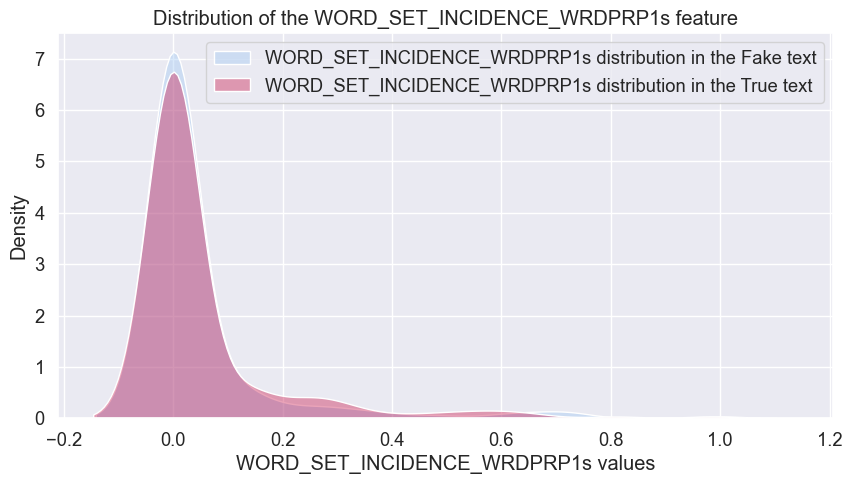

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1p


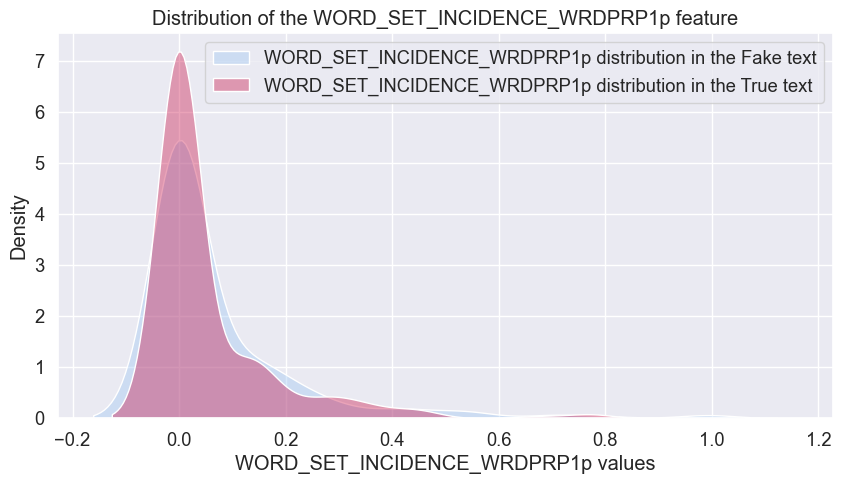

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP2


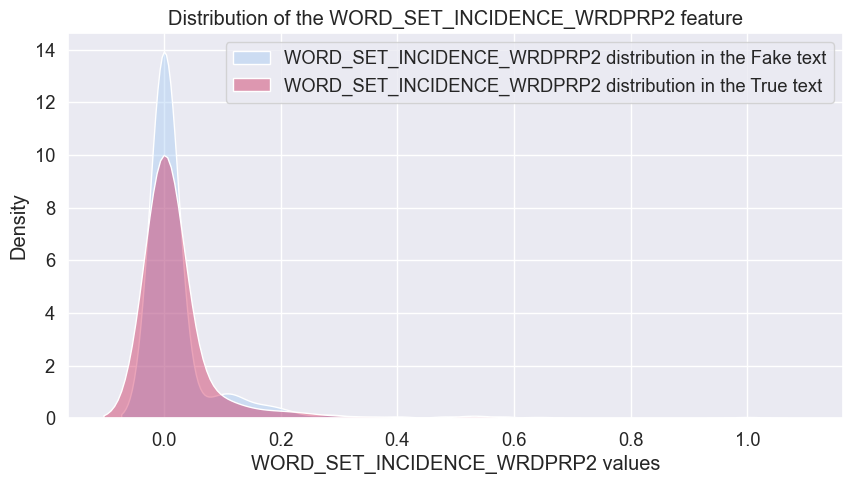

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3s


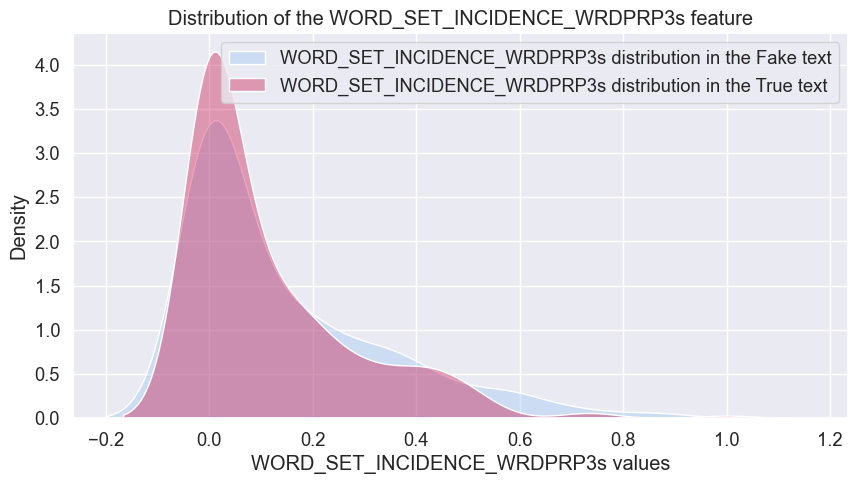

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3p


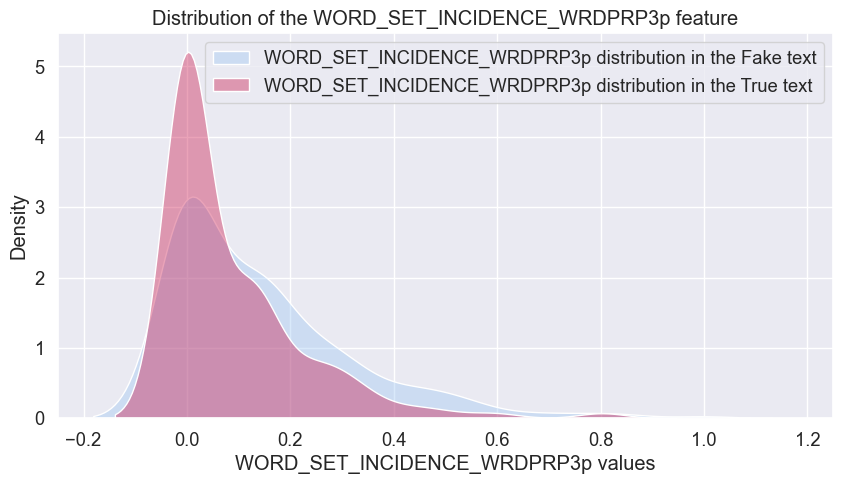

Linguistic feature: WORD_SET_INCIDENCE_CNCCaus


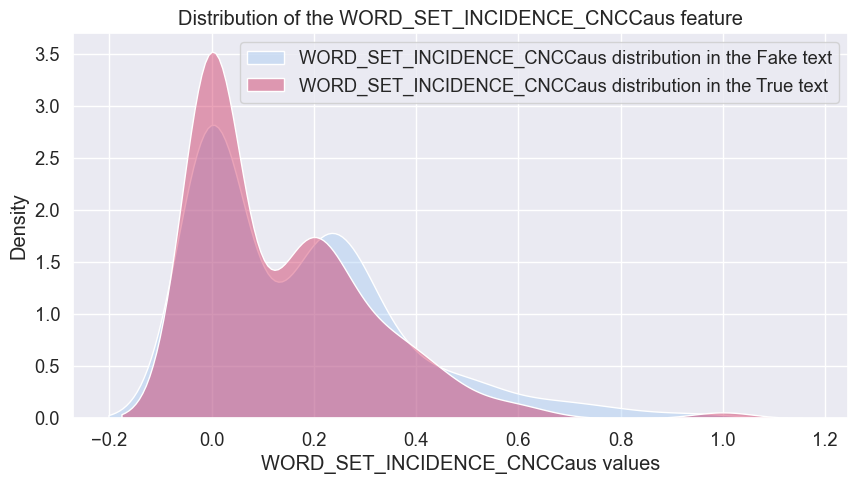

Linguistic feature: WORD_SET_INCIDENCE_CNCLogic


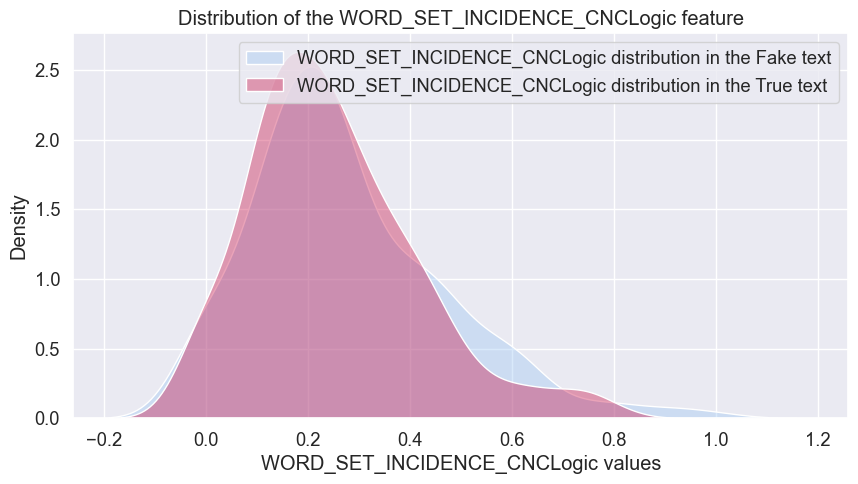

Linguistic feature: WORD_SET_INCIDENCE_CNCTemp


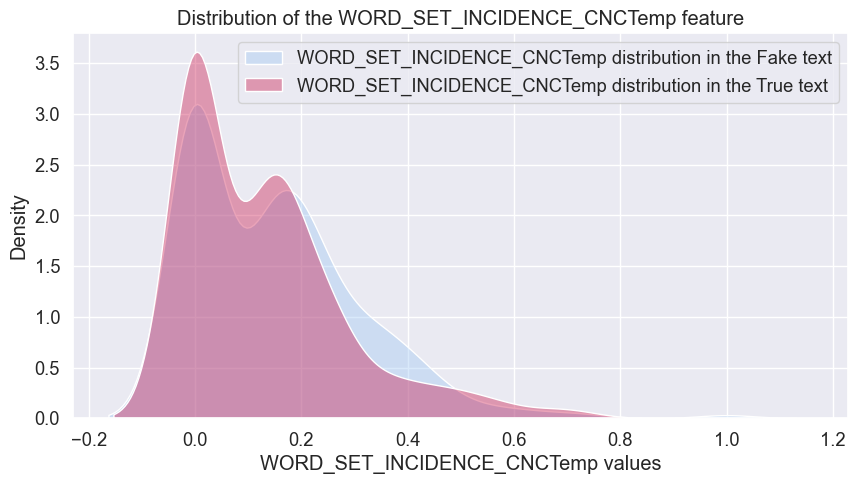

Linguistic feature: WORD_SET_INCIDENCE_CNCAdd


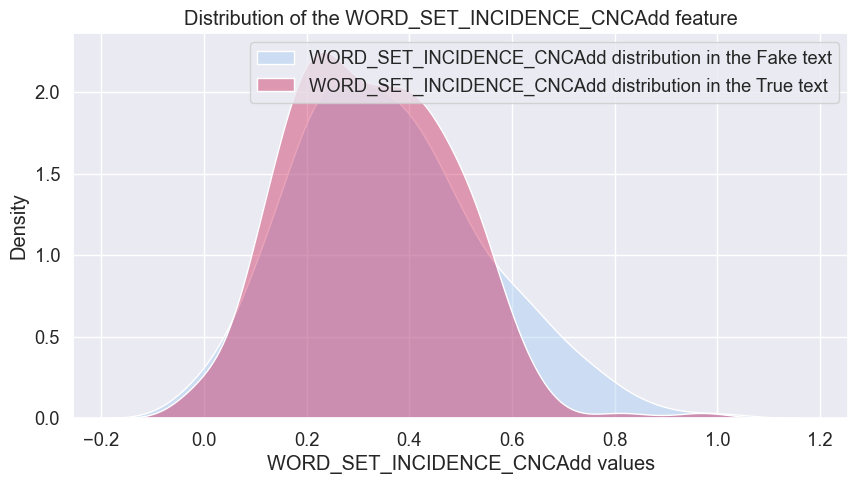

Linguistic feature: WORD_SET_INCIDENCE_CNCPos


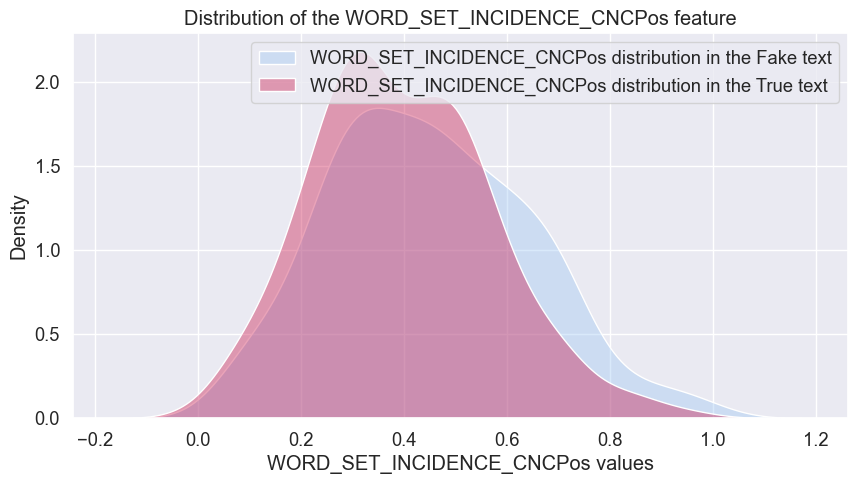

Linguistic feature: WORD_SET_INCIDENCE_CNCNeg


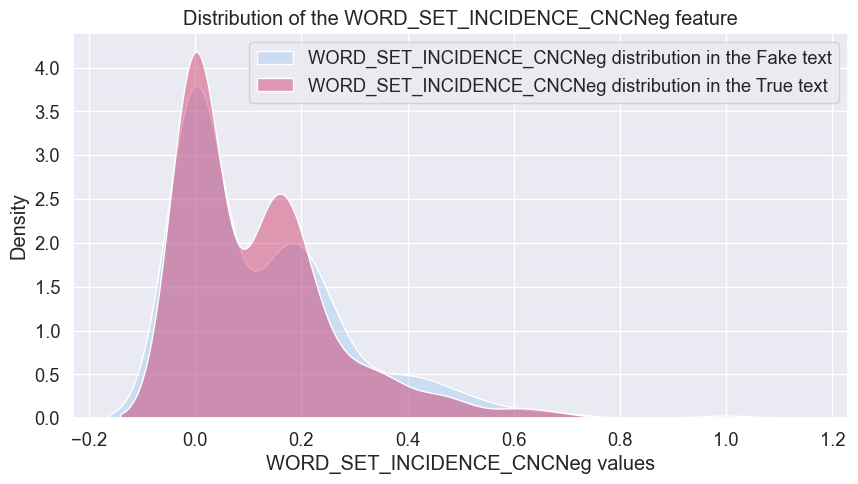

Linguistic feature: WORD_PROPERTY_WRDNOUN


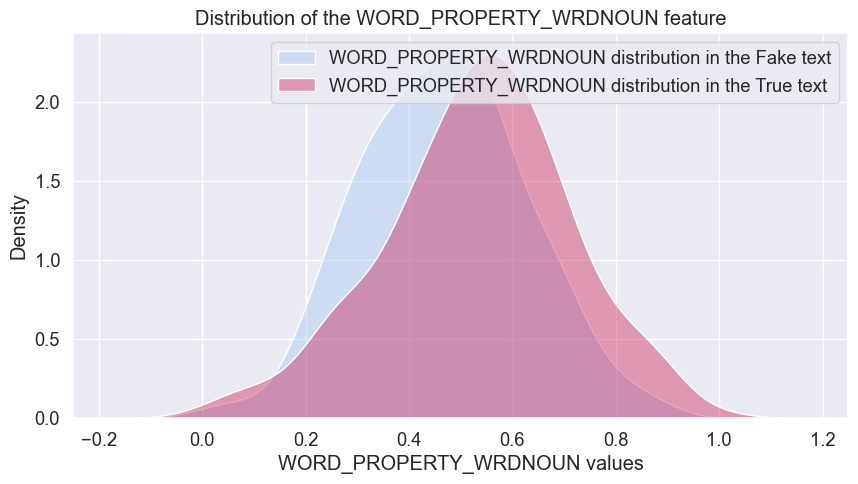

Linguistic feature: WORD_PROPERTY_WRDVERB


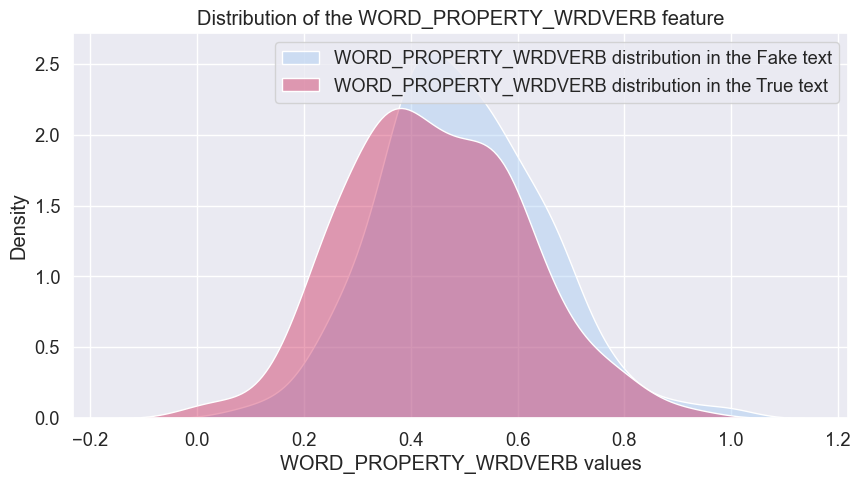

Linguistic feature: WORD_PROPERTY_WRDADJ


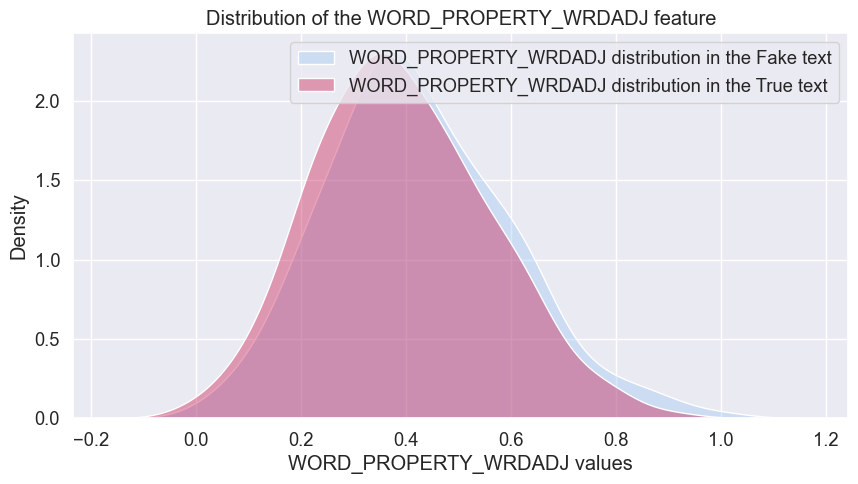

Linguistic feature: WORD_PROPERTY_WRDADV


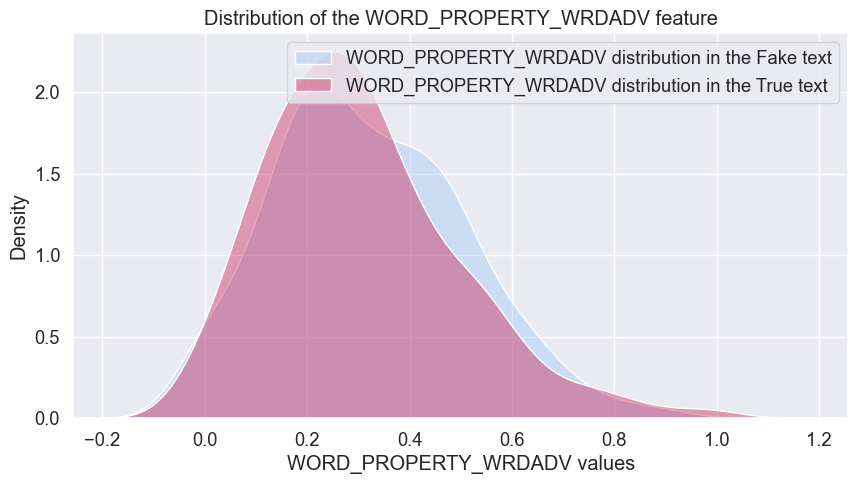

Linguistic feature: WORD_PROPERTY_WRDFRQc


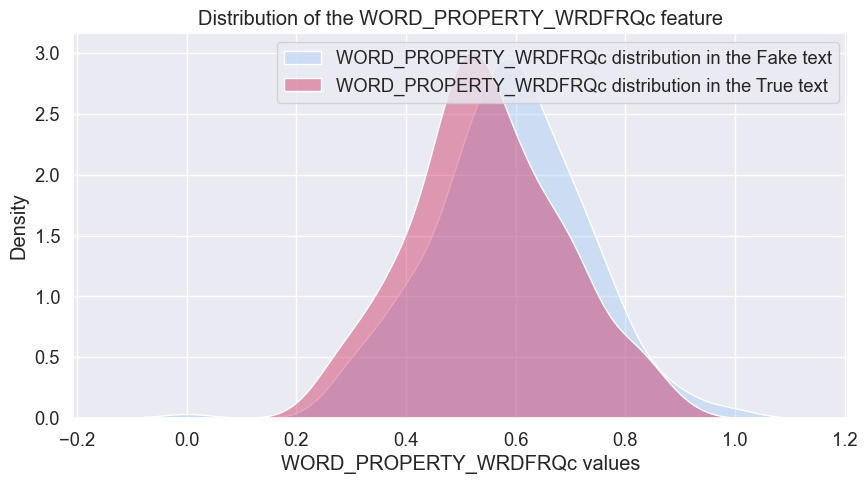

Linguistic feature: WORD_PROPERTY_WRDFRQa


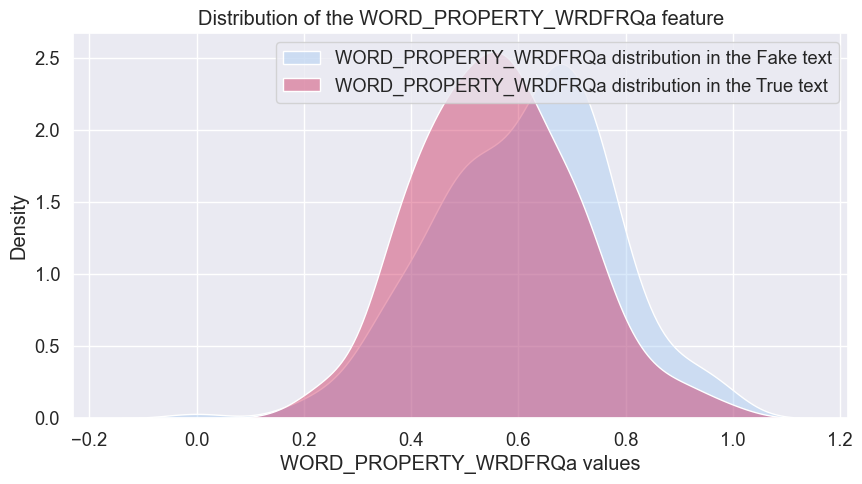

Linguistic feature: WORD_PROPERTY_WRDFRQmc


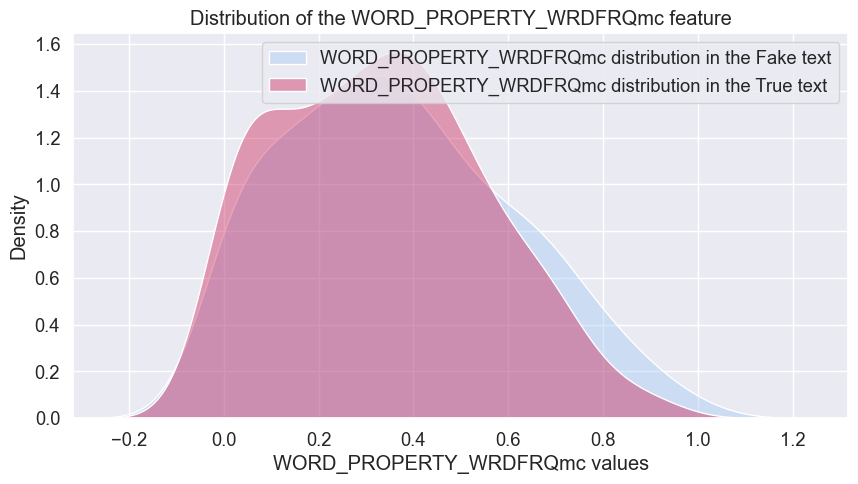

Linguistic feature: WORD_PROPERTY_WRDFAMc


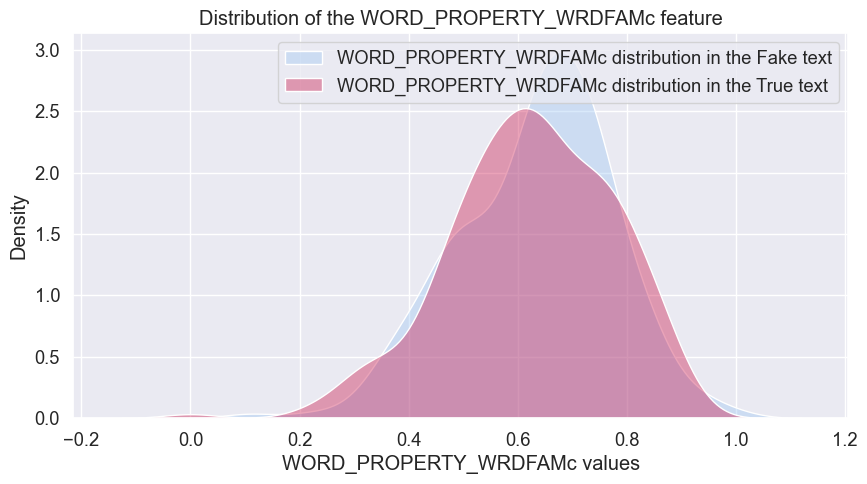

Linguistic feature: WORD_PROPERTY_WRDCNCc


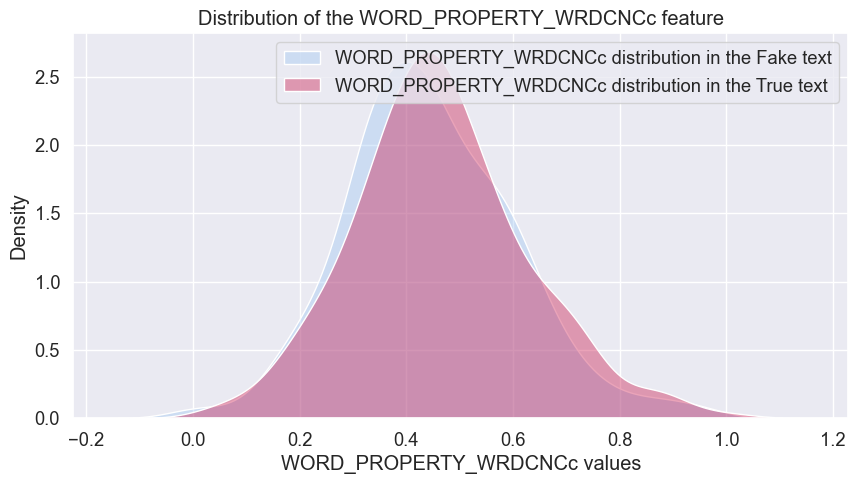

Linguistic feature: WORD_PROPERTY_WRDIMGc


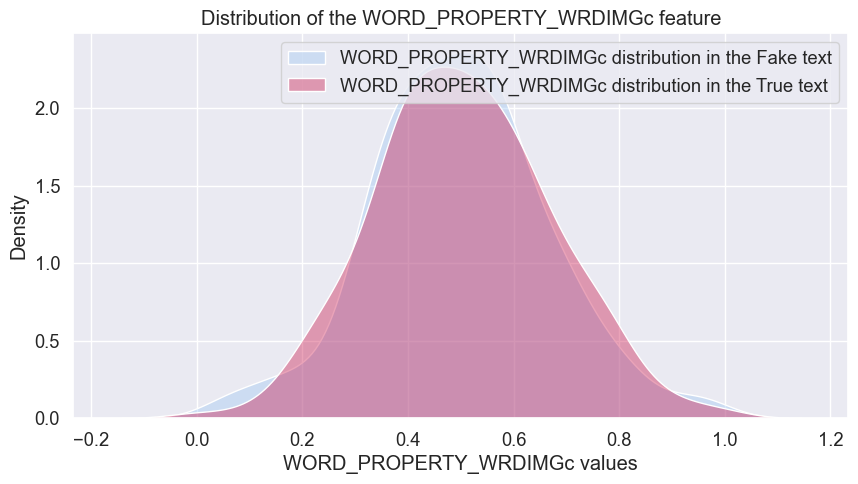

Linguistic feature: WORD_PROPERTY_WRDMEAc


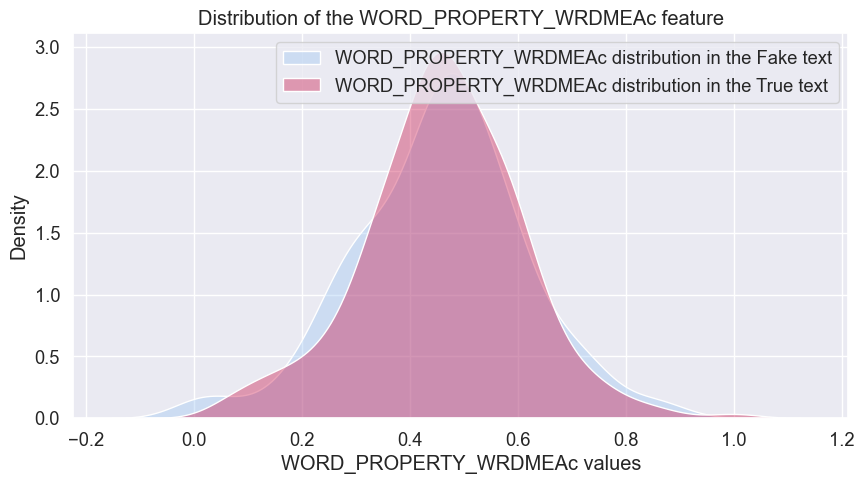

Linguistic feature: WORD_PROPERTY_WRDPOLc


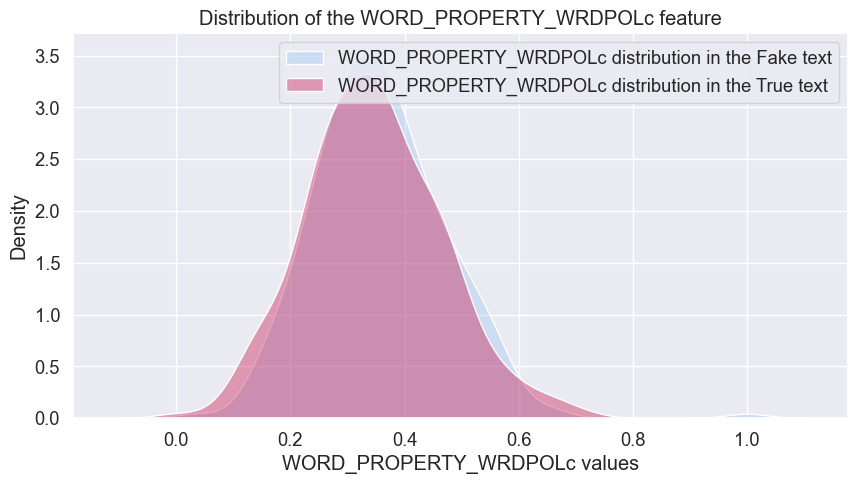

Linguistic feature: WORD_PROPERTY_WRDHYPn


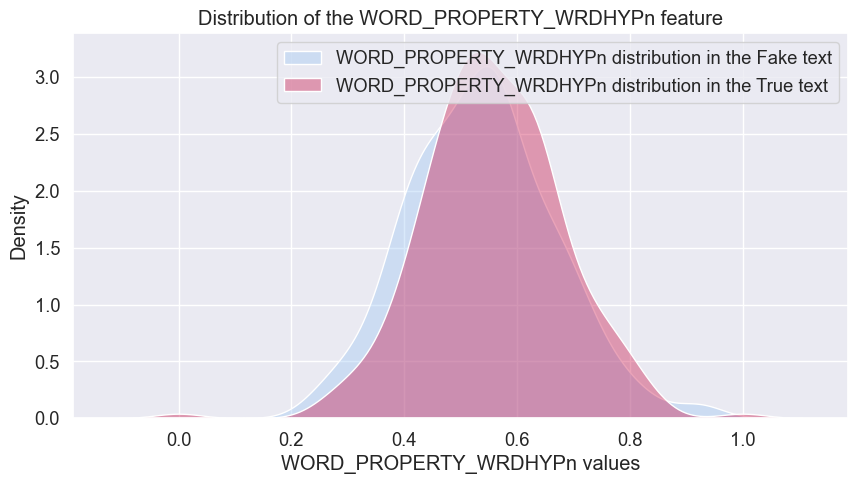

Linguistic feature: WORD_PROPERTY_WRDHYPv


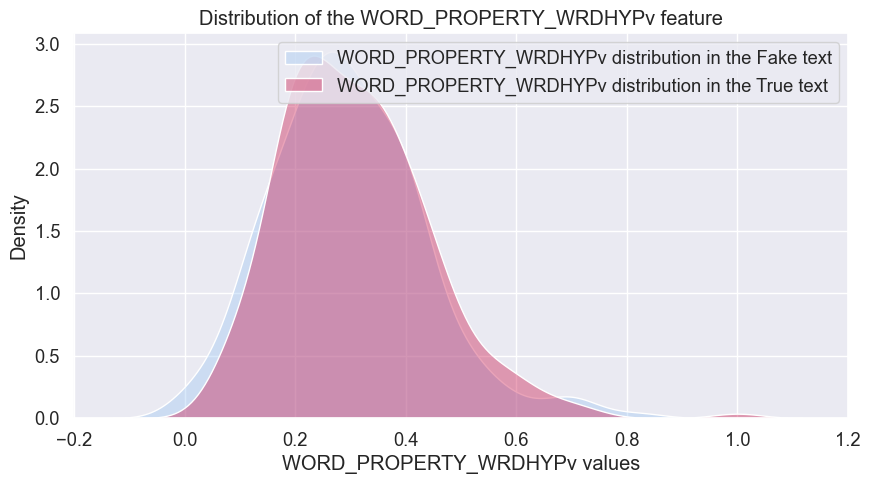

Linguistic feature: WORD_PROPERTY_WRDHYPnv


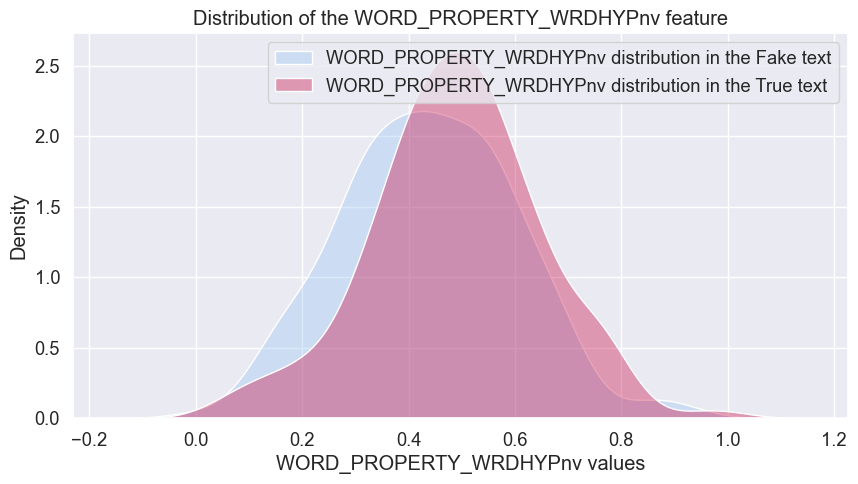

Linguistic feature: WORD_PROPERTY_AOA


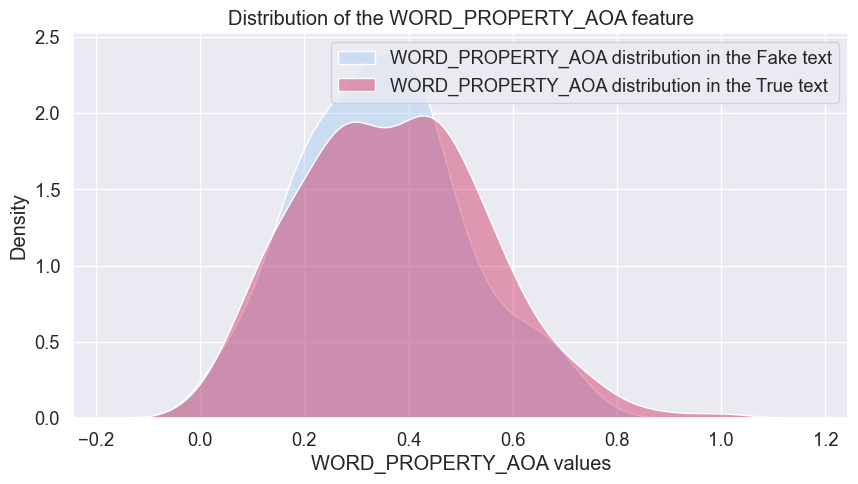

Linguistic feature: WORD_PROPERTY_AOA_MAX


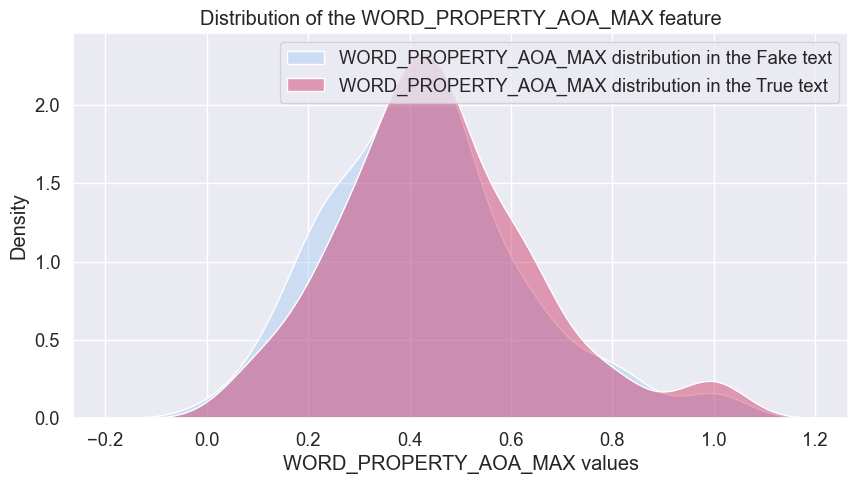

Linguistic feature: WORD_PROPERTY_CONCRETENESS


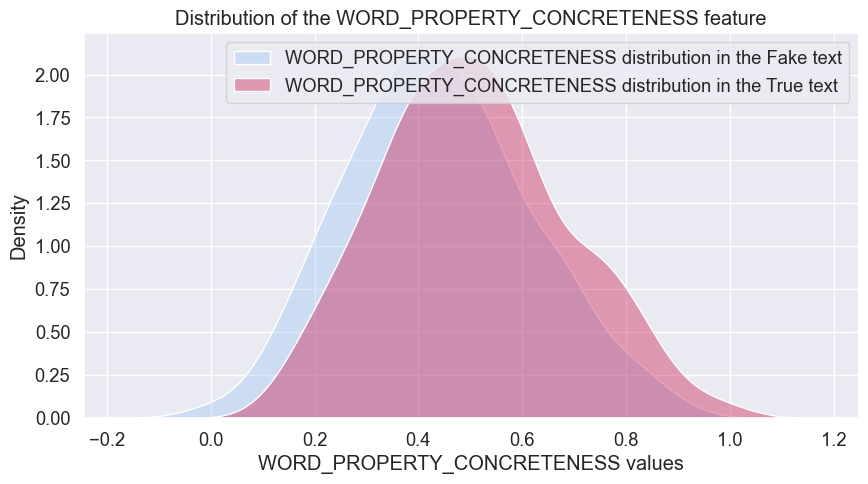

Linguistic feature: WORD_PROPERTY_PREVALENCE


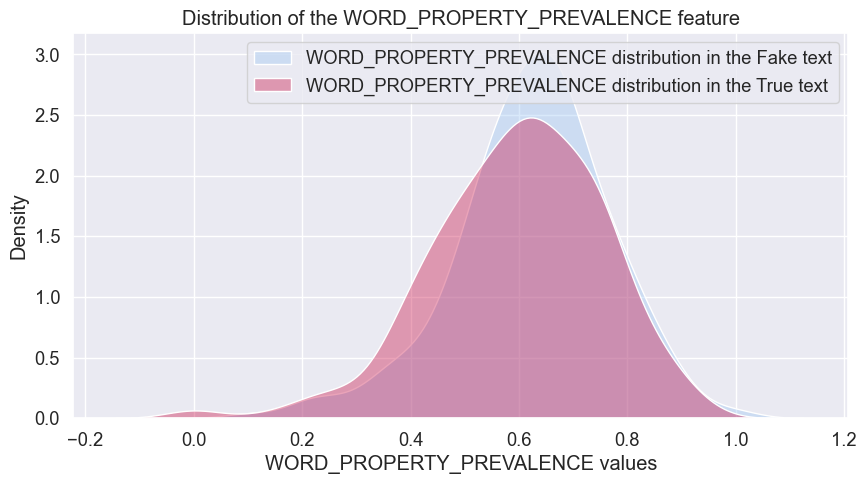

Linguistic feature: WORD_PROPERTY_PREVALENCE_MIN


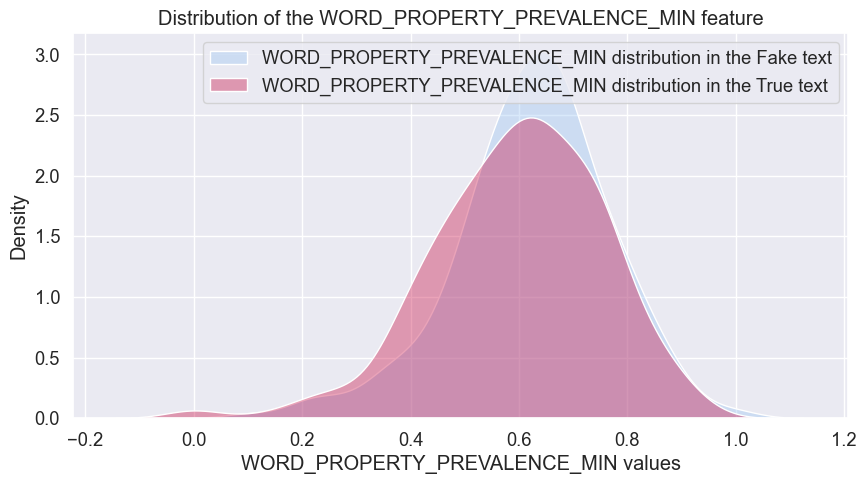

Linguistic feature: WORD_SET_INCIDENCE_C4_COMMON_WORDS


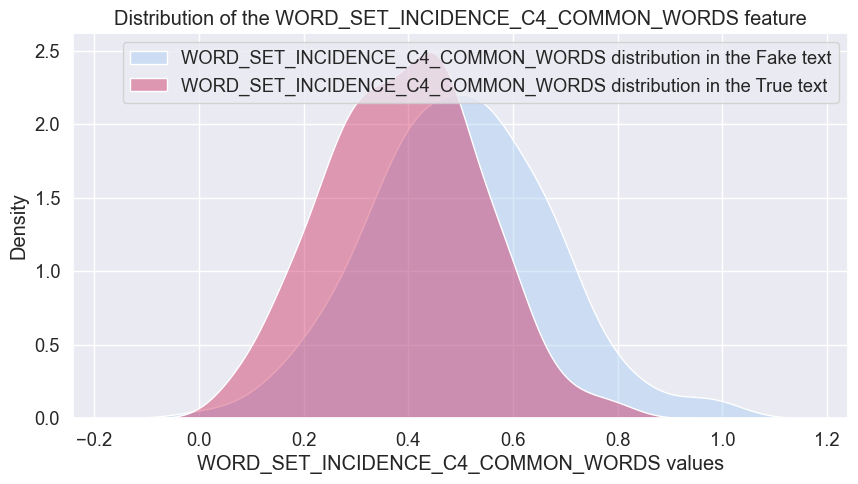

Linguistic feature: Polarity


C:\Users\alber\AppData\Local\Temp\ipykernel_184\3485523698.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(target_fake[[col]],fill=True, alpha=0.4, palette="pastel", multiple="stack")


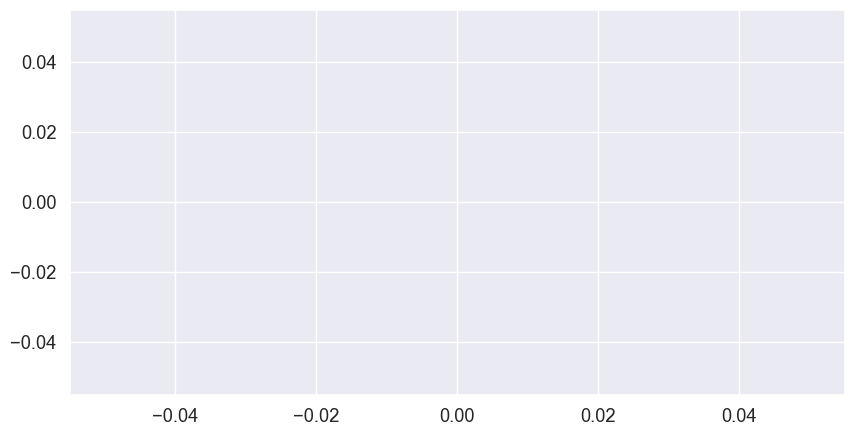

In [14]:
# plotting the distributions of the features


for col in df_scaled:
  try:
    print("Linguistic feature:", col)

    target_fake = df_scaled[df_scaled['Polarity'] == "Fake"]
    target_true = df_scaled[df_scaled['Polarity'] == "True"]



    fig, ax = plt.subplots(figsize=(10, 5))
    sns.set_theme(style='darkgrid', font_scale=1.2)
    sns.kdeplot(target_fake[[col]],fill=True, alpha=0.4, palette="pastel", multiple="stack")
    sns.kdeplot(target_true[[col]], fill=True, alpha=0.4, palette="rocket" , multiple="stack")           

    
    plt.title("Distribution of the {} feature".format(col))
    plt.legend(labels = ["{} distribution in the Fake text".format(col), "{} distribution in the True text".format(col)])
    plt.xlabel("{} values".format(col))

    plt.show()
  except:
    continue



